# How fast are things moving in the CMD?!

In [1]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import pdist, cdist
from matplotlib import pyplot as plt
from glob import glob

In [2]:
sdss_queries = glob('../data/GaiaQueries/DR3*')
sdss = []
for q in sdss_queries:
    df = pd.read_csv(q, index_col=0, usecols=['source_id','phot_g_mean_mag','r_med_photogeo','ag_gspphot','bp_rp','ebpminrp_gspphot','u','err_u','g','err_g','r','err_r','i','err_i','z','err_z'])
    df.loc[np.isnan(df['ag_gspphot']),'ag_gspphot'] = 0.0
    df.loc[np.isnan(df['ebpminrp_gspphot']),'ebpminrp_gspphot'] = 0.0
    df.replace(-9999.0, np.nan, inplace=True)
    df['bp_rp_0'] = df['bp_rp'] - df['ebpminrp_gspphot']
    sdss.append(df)
sdss = pd.concat(sdss)
sdss.head()

phot_g_mean_mag     bp_rp  ag_gspphot  ebpminrp_gspphot  \
source_id                                                                      
5041740170358770944        14.197693  0.851795      0.0549            0.0294   
3504476267364687232        14.597240  0.838298      0.1833            0.0989   
6240929124265524096        11.277658  0.833157      0.2195            0.1189   
6279444260669526784        14.968318  1.242106      0.5598            0.2985   
5458335780274988032        11.320326  0.866427      0.1691            0.0911   

                     r_med_photogeo         u     err_u         g     err_g  \
source_id                                                                     
5041740170358770944       773.41760  15.99190  0.006203  14.66312  0.002955   
3504476267364687232       973.47570  16.25610  0.006034  15.00364  0.003116   
6240929124265524096       415.14470  14.26308  0.005417  12.04220  0.000987   
6279444260669526784      5820.54440  17.58118  0.012508  15.72356  0.003418   
5458335780274988032       303.99237  14.26307  0.004319  12.18475  0.001185   

                            r     err_r         i     err_i         z  \
source_id                                                               
5041740170358770944  14.17544  0.003381  14.52660  0.003876  13.98173   
3504476267364687232  14.58853  0.003069  14.43296  0.003406  14.37867   
6240929124265524096  11.35405  0.000883  11.19708  0.000958  12.96183   
6279444260669526784  14.94544  0.003503  14.61933  0.003841  14.42062   
5458335780274988032  13.72176  0.006597  11.21733  0.001004  12.39492   

                        err_z   bp_rp_0  
source_id                                
5041740170358770944  0.004101  0.822395  
3504476267364687232  0.004086  0.739398  
6240929124265524096  0.013169  0.714257  
6279444260669526784  0.004258  0.943606  
5458335780274988032  0.006201  0.775327

In [84]:
sdss.columns

Index(['phot_g_mean_mag', 'bp_rp', 'ag_gspphot', 'ebpminrp_gspphot',
       'r_med_photogeo', 'u', 'err_u', 'g', 'err_g', 'r', 'err_r', 'i',
       'err_i', 'z', 'err_z', 'bp_rp_0'],
      dtype='object')

In [3]:
gaia_spec = glob('../data/OutputFiles/synthetic*')
gaia = []
bands = ['u','g','r','i','z']
for s in gaia_spec:
    df = pd.read_csv(s, index_col=0)
    for band in bands:
        dmag = (2.5 / np.log(10))*df[f'Sdss_flux_error_{band}']/df[f'Sdss_flux_{band}']
        df.loc[:,f'Sdss_mag_{band}_error'] = dmag
    gaia.append(df)
gaia = pd.concat(gaia)
gaia.drop_duplicates(inplace=True)
gaia.head()

Sdss_mag_u  Sdss_mag_g  Sdss_mag_r  Sdss_mag_i  \
source_id                                                             
5041740170358770944   15.886110   14.671517   14.175397   14.041373   
3504476267364687232   16.215489   15.048675   14.586661   14.451706   
6240929124265524096   12.877528   11.724772   11.265699   11.130312   
6279444260669526784   17.504722   15.788334   14.955607   14.647730   
5458335780274988032   12.994116   11.805503   11.305551   11.158472   

                     Sdss_mag_z   Sdss_flux_u   Sdss_flux_g   Sdss_flux_r  \
source_id                                                                   
5041740170358770944   14.001285  1.605299e-29  4.913525e-29  7.759635e-29   
3504476267364687232   14.400711  1.185235e-29  3.471604e-29  5.312947e-29   
6240929124265524096   11.076439  2.564418e-28  7.414657e-28  1.131672e-27   
6279444260669526784   14.469680  3.615023e-30  1.756574e-29  3.782310e-29   
5458335780274988032   11.107690  2.303316e-28  6.883334e-28  1.090887e-27   

                      Sdss_flux_i   Sdss_flux_z  Sdss_flux_error_u  \
source_id                                                            
5041740170358770944  8.779119e-29  9.109318e-29       1.929281e-31   
3504476267364687232  6.016135e-29  6.305445e-29       2.874475e-31   
6240929124265524096  1.281962e-27  1.347177e-27       4.308746e-30   
6279444260669526784  5.022360e-29  5.917361e-29       2.169566e-31   
5458335780274988032  1.249140e-27  1.308952e-27       3.696911e-30   

                     Sdss_flux_error_g  Sdss_flux_error_r  Sdss_flux_error_i  \
source_id                                                                      
5041740170358770944       9.526776e-32       1.079710e-31       1.097714e-31   
3504476267364687232       9.993177e-32       1.011128e-31       1.175334e-31   
6240929124265524096       2.367196e-30       1.901199e-30       1.325545e-30   
6279444260669526784       7.879414e-32       1.036239e-31       1.185829e-31   
5458335780274988032       2.089872e-30       1.818976e-30       1.437645e-30   

                     Sdss_flux_error_z  Sdss_mag_u_error  Sdss_mag_g_error  \
source_id                                                                    
5041740170358770944       1.710697e-31          0.013049          0.002105   
3504476267364687232       1.783643e-31          0.026332          0.003125   
6240929124265524096       1.878004e-30          0.018243          0.003466   
6279444260669526784       1.946543e-31          0.065161          0.004870   
5458335780274988032       1.489040e-30          0.017426          0.003296   

                     Sdss_mag_r_error  Sdss_mag_i_error  Sdss_mag_z_error  
source_id                                                                  
5041740170358770944          0.001511          0.001358          0.002039  
3504476267364687232          0.002066          0.002121          0.003071  
6240929124265524096          0.001824          0.001123          0.001514  
6279444260669526784          0.002975          0.002564          0.003572  
5458335780274988032          0.001810          0.001250          0.001235

In [4]:
times = pd.read_csv('../data/OutputFiles/obs_times.csv',index_col=0)
print(len(sdss),len(gaia),len(times))

4598275 4598275 4598275


In [5]:
merged = pd.merge(gaia,sdss, left_index=True, right_index=True)
merged = pd.merge(merged,times, left_index=True, right_index=True)
merged.drop_duplicates(inplace=True)
merged.dropna(inplace=True)
merged.head()

Sdss_mag_u  Sdss_mag_g  Sdss_mag_r  Sdss_mag_i  \
source_id                                                             
5041740170358770944   15.886110   14.671517   14.175397   14.041373   
3504476267364687232   16.215489   15.048675   14.586661   14.451706   
6240929124265524096   12.877528   11.724772   11.265699   11.130312   
6279444260669526784   17.504722   15.788334   14.955607   14.647730   
5458335780274988032   12.994116   11.805503   11.305551   11.158472   

                     Sdss_mag_z   Sdss_flux_u   Sdss_flux_g   Sdss_flux_r  \
source_id                                                                   
5041740170358770944   14.001285  1.605299e-29  4.913525e-29  7.759635e-29   
3504476267364687232   14.400711  1.185235e-29  3.471604e-29  5.312947e-29   
6240929124265524096   11.076439  2.564418e-28  7.414657e-28  1.131672e-27   
6279444260669526784   14.469680  3.615023e-30  1.756574e-29  3.782310e-29   
5458335780274988032   11.107690  2.303316e-28  6.883334e-28  1.090887e-27   

                      Sdss_flux_i   Sdss_flux_z  ...     err_g         r  \
source_id                                        ...                       
5041740170358770944  8.779119e-29  9.109318e-29  ...  0.002955  14.17544   
3504476267364687232  6.016135e-29  6.305445e-29  ...  0.003116  14.58853   
6240929124265524096  1.281962e-27  1.347177e-27  ...  0.000987  11.35405   
6279444260669526784  5.022360e-29  5.917361e-29  ...  0.003418  14.94544   
5458335780274988032  1.249140e-27  1.308952e-27  ...  0.001185  13.72176   

                        err_r         i     err_i         z     err_z  \
source_id                                                               
5041740170358770944  0.003381  14.52660  0.003876  13.98173  0.004101   
3504476267364687232  0.003069  14.43296  0.003406  14.37867  0.004086   
6240929124265524096  0.000883  11.19708  0.000958  12.96183  0.013169   
6279444260669526784  0.003503  14.61933  0.003841  14.42062  0.004258   
5458335780274988032  0.006597  11.21733  0.001004  12.39492  0.006201   

                      bp_rp_0   mean_xp_bjd      sdss_bjd  
source_id                                                  
5041740170358770944  0.822395  57176.470449  54061.003939  
3504476267364687232  0.739398  57166.948324  51667.006186  
6240929124265524096  0.714257  57135.862350  53527.006320  
6279444260669526784  0.943606  57126.819364  53880.006120  
5458335780274988032  0.775327  57136.478267  53764.004158  

[5 rows x 38 columns]

In [6]:
merged.to_csv('../data/OutputFiles/merged_sdss_gaia_with_bjds.csv')

In [7]:
cleaner = ((merged['u'] < 17) & 
           (merged['g'] < 17) & 
           (merged['r'] < 17) & 
           (merged['i'] < 17) & 
           (merged['z'] < 17))
clean = merged[cleaner]
len(clean)

3462924

In [ ]:
vec_sdss = np.vstack((merged['g'].values, merged['u'].values-merged['g'].values,merged['g'].values-merged['r'].values,merged['r'].values-merged['i'].values,merged['i'].values-merged['z'].values)).T
vec_gaia = np.vstack((merged['Sdss_mag_g'].values, merged['Sdss_mag_u'].values-merged['Sdss_mag_g'].values,merged['Sdss_mag_g'].values-merged['r'].values,merged['Sdss_mag_r'].values-merged['Sdss_mag_i'].values,merged['Sdss_mag_i'].values-merged['Sdss_mag_z'].values)).T
cov_sdss = np.vstack((merged['err_g'].values ** 2.0, merged['err_u'].values ** 2.0 + merged['err_g'].values ** 2.0, merged['err_g'].values ** 2.0 + merged['err_r'].values ** 2.0, merged['err_r'].values ** 2.0 + merged['err_i'].values ** 2.0, merged['err_i'].values ** 2.0 + merged['err_z'].values ** 2.0)).T
cov_gaia = np.vstack((merged['Sdss_mag_g_error'].values ** 2.0, merged['Sdss_mag_u_error'].values ** 2.0 + merged['Sdss_mag_g_error'].values ** 2.0, merged['Sdss_mag_g_error'].values ** 2.0 + merged['Sdss_mag_r_error'].values ** 2.0, merged['Sdss_mag_r_error'].values ** 2.0 + merged['Sdss_mag_i_error'].values ** 2.0, merged['Sdss_mag_i_error'].values ** 2.0 + merged['Sdss_mag_z_error'].values ** 2.0)).T
cov_full = cov_sdss+cov_gaia

distance = np.diag(cdist(vec_sdss, vec_gaia))
distance

In [66]:
inv_cov = np.array([np.diag(1.0/i) for i in cov_full])
distance_m = np.diag(cdist(vec_sdss, vec_gaia, metric='mahalanobis', VI=inv_cov))

/Users/carina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


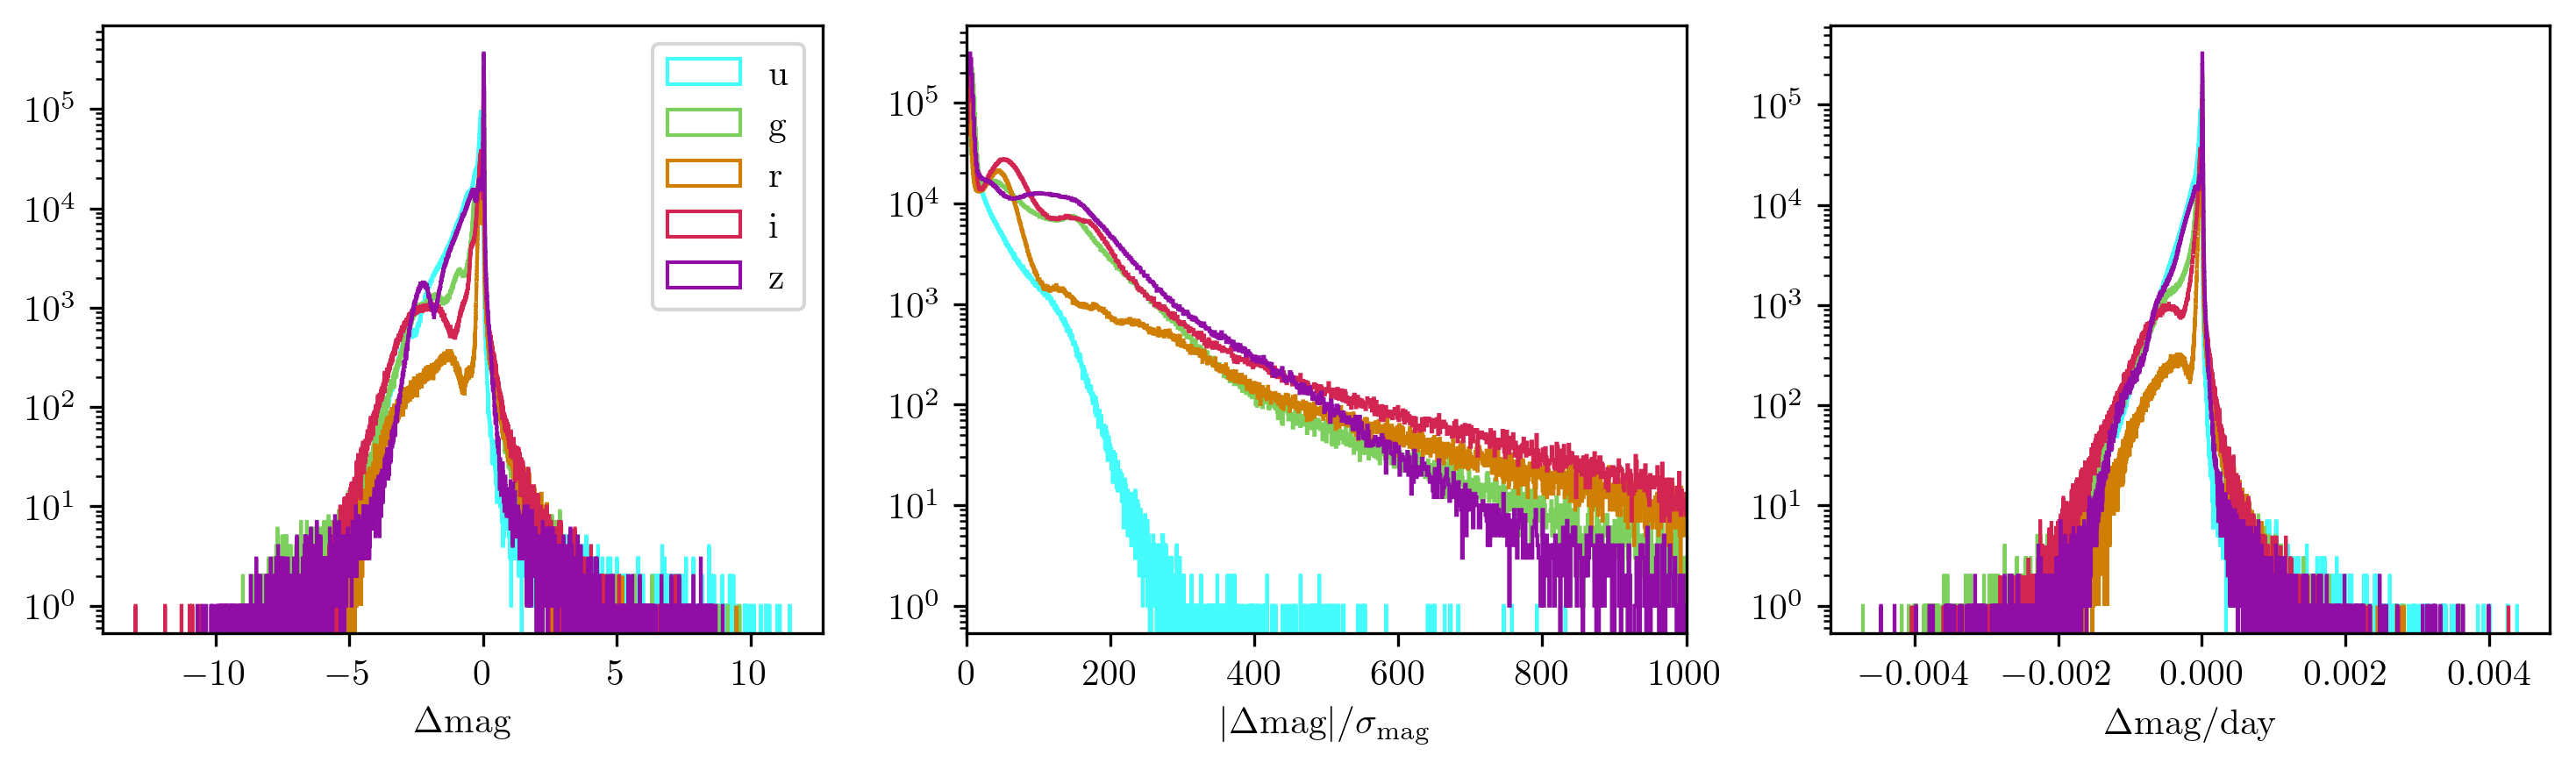

In [8]:
import cmasher as cmr

fig, ax = plt.subplots(1, 3, figsize=(12,3), dpi=300)
cmap = cmr.get_sub_cmap('cmr.tropical_r', start=0, stop=1)
band_c_dict = {'u':cmap(0),'g':cmap(0.25),'r':cmap(0.5),'i':cmap(0.75),'z':cmap(1-1e-14)}
df = pd.DataFrame()
for band in bands:
    dif = clean[f'Sdss_mag_{band}']-clean[band]
    ax[0].hist(dif, bins='auto', histtype='step', ec=band_c_dict[band], label=band)
    ax[1].hist(np.abs(dif) / np.sqrt(clean[f'err_{band}']**2.0 + clean[f'Sdss_mag_{band}_error']**2.0), bins='auto', histtype='step', ec=band_c_dict[band])
    ax[2].hist(dif / (clean['mean_xp_bjd']-clean['sdss_bjd']), bins='auto', histtype='step', ec=band_c_dict[band])
    clean.loc[:,f'Delta_{band}_per_kyr'] = 1e3*dif / (clean['mean_xp_bjd']-clean['sdss_bjd'])
ax[0].legend()
ax[0].set_xlabel(r'$\Delta$mag')
ax[1].set_xlabel(r'$|\Delta{\rm mag}|/\sigma_{\rm mag}$')
ax[2].set_xlabel(r'$\Delta{\rm mag}/{\rm day}$')
ax[0].set_yscale('log')
ax[1].set_xlim(0,1000)
ax[1].set_yscale('log')
ax[2].set_yscale('log')
#ax[2].set_xlim(-2,2)
plt.savefig('../plots/dmag_hist.pdf', bbox_inches='tight')

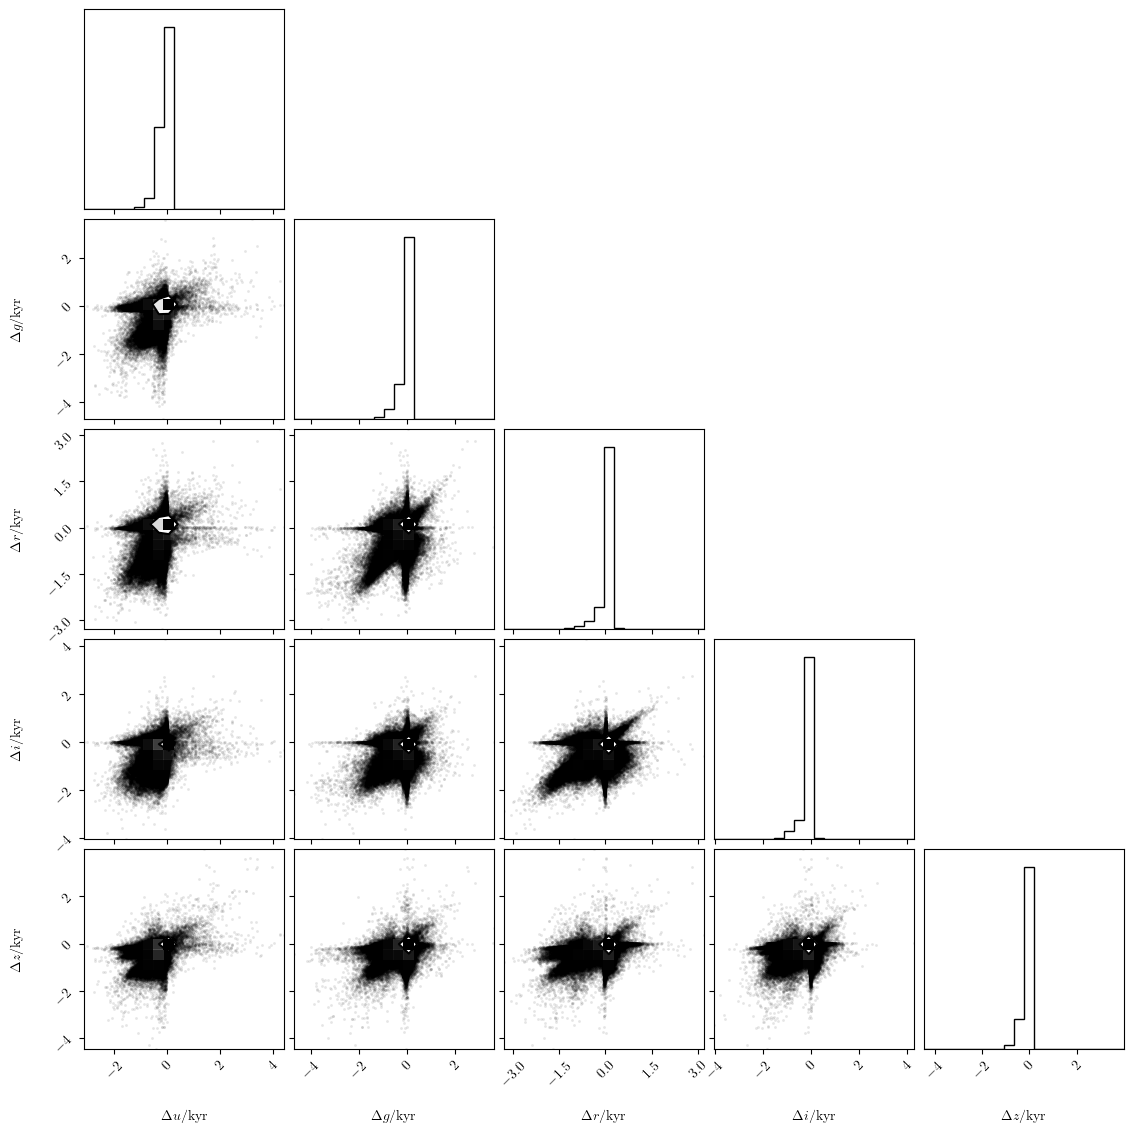

In [9]:
import corner
fig = corner.corner(clean[[f'Delta_{band}_per_kyr' for band in bands]], labels=[fr'$\Delta {band}/'+r'{\rm kyr}$' for band in bands], dpi=300)

In [10]:
M_G = clean['phot_g_mean_mag'] - 5*np.log10(clean['r_med_photogeo']) + 5 - clean['ag_gspphot']
clean['M_G'] = M_G

/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
clean.to_csv('../data/OutputFiles/cleaned_sample_with_dMag_per_time_and_MG.csv')
clean = pd.read_csv('../data/OutputFiles/cleaned_sample_with_dMag_per_time_and_MG.csv', index_col=0)

In [79]:
clean = pd.read_csv('../data/OutputFiles/cleaned_sample_with_dMag_per_time_and_MG.csv', index_col=0)
clean.head()

Sdss_mag_u  Sdss_mag_g  Sdss_mag_r  Sdss_mag_i  \
source_id                                                             
5041740170358770944   15.886110   14.671517   14.175397   14.041373   
3504476267364687232   16.215489   15.048675   14.586661   14.451706   
6240929124265524096   12.877528   11.724772   11.265699   11.130312   
5458335780274988032   12.994116   11.805503   11.305551   11.158472   
5458347771823622016   14.597463   13.530668   13.205158   13.133030   

                     Sdss_mag_z   Sdss_flux_u   Sdss_flux_g   Sdss_flux_r  \
source_id                                                                   
5041740170358770944   14.001285  1.605299e-29  4.913525e-29  7.759635e-29   
3504476267364687232   14.400711  1.185235e-29  3.471604e-29  5.312947e-29   
6240929124265524096   11.076439  2.564418e-28  7.414657e-28  1.131672e-27   
5458335780274988032   11.107690  2.303316e-28  6.883334e-28  1.090887e-27   
5458347771823622016   13.128653  5.260354e-29  1.405183e-28  1.896430e-28   

                      Sdss_flux_i   Sdss_flux_z  ...     err_z   bp_rp_0  \
source_id                                        ...                       
5041740170358770944  8.779119e-29  9.109318e-29  ...  0.004101  0.822395   
3504476267364687232  6.016135e-29  6.305445e-29  ...  0.004086  0.739398   
6240929124265524096  1.281962e-27  1.347177e-27  ...  0.013169  0.714257   
5458335780274988032  1.249140e-27  1.308952e-27  ...  0.006201  0.775327   
5458347771823622016  2.026694e-28  2.034881e-28  ...  0.003080  0.590926   

                      mean_xp_bjd      sdss_bjd  Delta_u_per_kyr  \
source_id                                                          
5041740170358770944  57176.470449  54061.003939        -0.033956   
3504476267364687232  57166.948324  51667.006186        -0.007384   
6240929124265524096  57135.862350  53527.006320        -0.383931   
5458335780274988032  57136.478267  53764.004158        -0.376268   
5458347771823622016  57136.802380  53764.004161        -0.018473   

                     Delta_g_per_kyr  Delta_r_per_kyr  Delta_i_per_kyr  \
source_id                                                                
5041740170358770944         0.002695        -0.000014        -0.155748   
3504476267364687232         0.008188        -0.000340         0.003408   
6240929124265524096        -0.087958        -0.024482        -0.018501   
5458335780274988032        -0.112454        -0.716450        -0.017452   
5458347771823622016         0.011097         0.003528         0.007136   

                     Delta_z_per_kyr       M_G  
source_id                                       
5041740170358770944         0.006277  4.700723  
3504476267364687232         0.004007  4.472314  
6240929124265524096        -0.522435  2.967161  
5458335780274988032        -0.381687  3.736913  
5458347771823622016         0.009569  3.125403  

[5 rows x 44 columns]

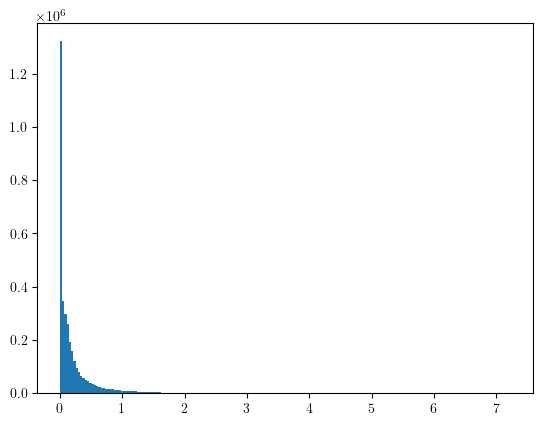

In [13]:
plt.hist(clean['ag_gspphot'],bins=200);

In [14]:
# MIST
Mnames = 'EEP          log10_isochrone_age_yr                    initial_mass                       star_mass                        log_Teff                           log_g                           log_L                     [Fe/H]_init              [Fe/H]           Bessell_U           Bessell_B           Bessell_V           Bessell_R           Bessell_I             2MASS_J             2MASS_H            2MASS_Ks           Kepler_Kp          Kepler_D51        Hipparcos_Hp             Tycho_B             Tycho_V       Gaia_G_DR2Rev      Gaia_BP_DR2Rev      Gaia_RP_DR2Rev          Gaia_G_MAW        Gaia_BP_MAWb        Gaia_BP_MAWf         Gaia_RP_MAW                TESS         Gaia_G_EDR3        Gaia_BP_EDR3        Gaia_RP_EDR3               phase'
Mnames = Mnames.split()



#Adopting [Fe/H] = 0,-0.5,-1 for galactic massive stars, the LMC, and the SMC respectively...
Galfile = '../data/MIST_v1.2_vvcrit0.4_UBVRIplus/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'


Gmist = pd.read_table(Galfile, delim_whitespace=True, comment='#', names=Mnames)
Gmist

EEP  log10_isochrone_age_yr  initial_mass  star_mass  log_Teff  \
0         10                     5.0      0.100000   0.100000  3.468545   
1         11                     5.0      0.102298   0.102298  3.469593   
2         12                     5.0      0.106603   0.106603  3.471545   
3         13                     5.0      0.110893   0.110893  3.473476   
4         14                     5.0      0.115180   0.115180  3.475391   
...      ...                     ...           ...        ...       ...   
105589  1706                    10.3      0.856272   0.528715  4.370643   
105590  1707                    10.3      0.856302   0.528717  4.363336   
105591  1708                    10.3      0.856335   0.528720  4.356026   
105592  1709                    10.3      0.856371   0.528724  4.348711   
105593  1710                    10.3      0.856412   0.528727  4.341393   

           log_g     log_L  [Fe/H]_init    [Fe/H]  Bessell_U  ...  \
0       3.117013 -0.850039          0.0  0.041798  11.850742  ...   
1       3.112695 -0.833437          0.0  0.041798  11.800797  ...   
2       3.104731 -0.802504          0.0  0.041798  11.707819  ...   
3       3.096969 -0.771909          0.0  0.041798  11.615778  ...   
4       3.089426 -0.741606          0.0  0.041798  11.524315  ...   
...          ...       ...          ...       ...        ...  ...   
105589  7.779334 -1.180793          0.0  0.030138   9.015346  ...   
105590  7.782175 -1.212858          0.0  0.030145   9.067208  ...   
105591  7.784962 -1.244886          0.0  0.030151   9.118649  ...   
105592  7.787695 -1.276875          0.0  0.030157   9.169754  ...   
105593  7.790376 -1.308824          0.0  0.030166   9.220619  ...   

        Gaia_RP_DR2Rev  Gaia_G_MAW  Gaia_BP_MAWb  Gaia_BP_MAWf  Gaia_RP_MAW  \
0             7.245710    8.570848     10.815093     10.836660     7.218062   
1             7.201033    8.524260     10.759536     10.781235     7.173437   
2             7.117674    8.437310     10.655613     10.677575     7.090179   
3             7.034995    8.351029     10.552106     10.574348     7.007603   
4             6.952775    8.265177     10.448620     10.471163     6.925489   
...                ...         ...           ...           ...          ...   
105589       10.351310   10.113084      9.997040      9.961931    10.336052   
105590       10.385054   10.150873     10.037067     10.002710    10.369794   
105591       10.418270   10.188148     10.076590     10.042985    10.403009   
105592       10.451022   10.224970     10.115669     10.082817    10.435760   
105593       10.483384   10.261410     10.154380     10.122280    10.468120   

             TESS  Gaia_G_EDR3  Gaia_BP_EDR3  Gaia_RP_EDR3  phase  
0        7.050297     8.586956     10.833892      7.221495   -1.0  
1        7.006680     8.540395     10.778332      7.176799   -1.0  
2        6.925337     8.453498     10.674408      7.093401   -1.0  
3        6.844711     8.367273     10.570904      7.010676   -1.0  
4        6.764601     8.281481     10.467423      6.928403   -1.0  
...           ...          ...           ...           ...    ...  
105589  10.338735    10.124074     10.006373     10.354176    6.0  
105590  10.372460    10.162028     10.046507     10.387865    6.0  
105591  10.405661    10.199468     10.086135     10.421028    6.0  
105592  10.438397    10.236453     10.125319     10.453727    6.0  
105593  10.470741    10.273057     10.164132     10.486033    6.0  

[105594 rows x 34 columns]

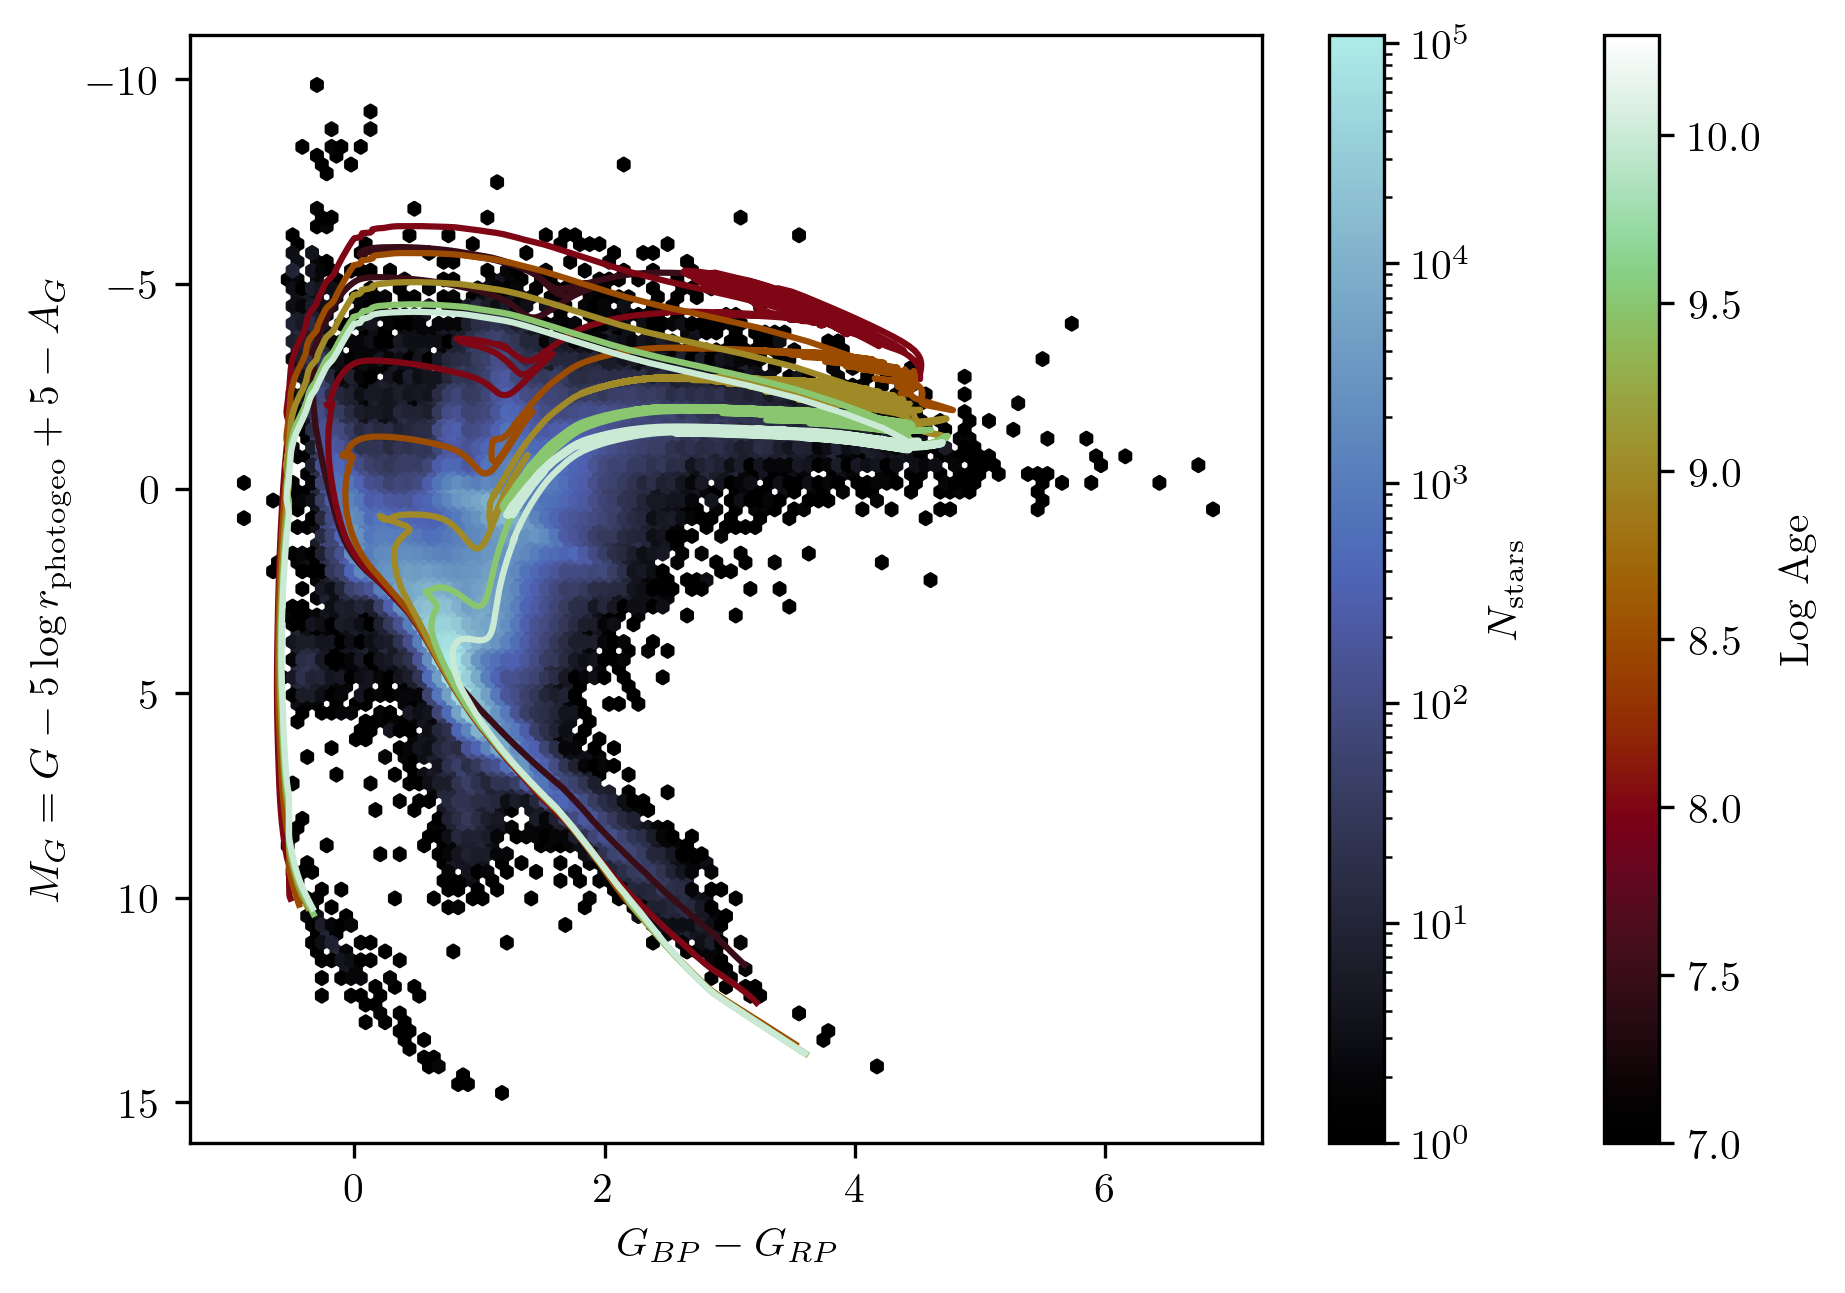

In [15]:
from matplotlib import cm

fig = plt.figure(dpi=300)

age_cmap = cmr.apple
age_norm = plt.Normalize(vmin=7,vmax=10.3)
plt.colorbar(cm.ScalarMappable(norm=age_norm, cmap=age_cmap), fraction=0.05, label='Log Age')


plt.hexbin(clean['bp_rp_0'], M_G, cmap='cmr.sapphire', mincnt=1, bins='log')
plt.colorbar(label=r'$N_{\rm stars}$')
for age,g in Gmist.groupby('log10_isochrone_age_yr'):
    if (age % 0.5 == 0)&(age > 7):
        plt.plot(g['Gaia_BP_EDR3']-g['Gaia_RP_EDR3'],g['Gaia_G_EDR3'],c=age_cmap(age_norm(age)))
plt.gca().invert_yaxis()

plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$M_G = G - 5\log r_{\rm photogeo} + 5 - A_G$')

plt.savefig('../plots/GaiaCMD_sample.pdf', bbox_inches='tight')

# We can see how lovely some parts of this are filled out, but there are some bins with only 1 star! Let's use an adaptive binning scheme called ``QTHist2D''

In [16]:
from qthist2d import qthist, qtcount
num, xmin, xmax, ymin, ymax = qthist(clean['bp_rp_0'], clean['M_G'], N=6, thresh=3)

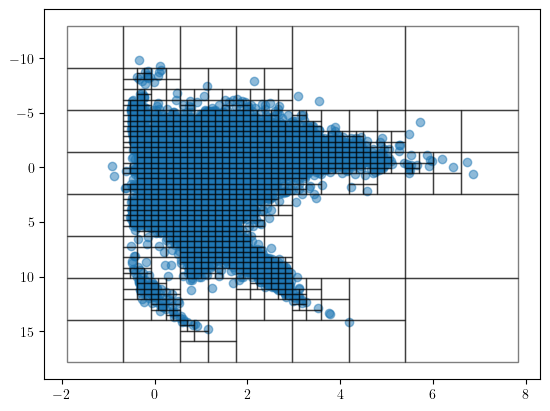

In [18]:
fig = plt.figure()

ax = fig.add_subplot(111)

plt.scatter(clean['bp_rp_0'], clean['M_G'], alpha=0.5, rasterized=True)

for k in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc ='none', ec='k', alpha=0.5))
ax.invert_yaxis()

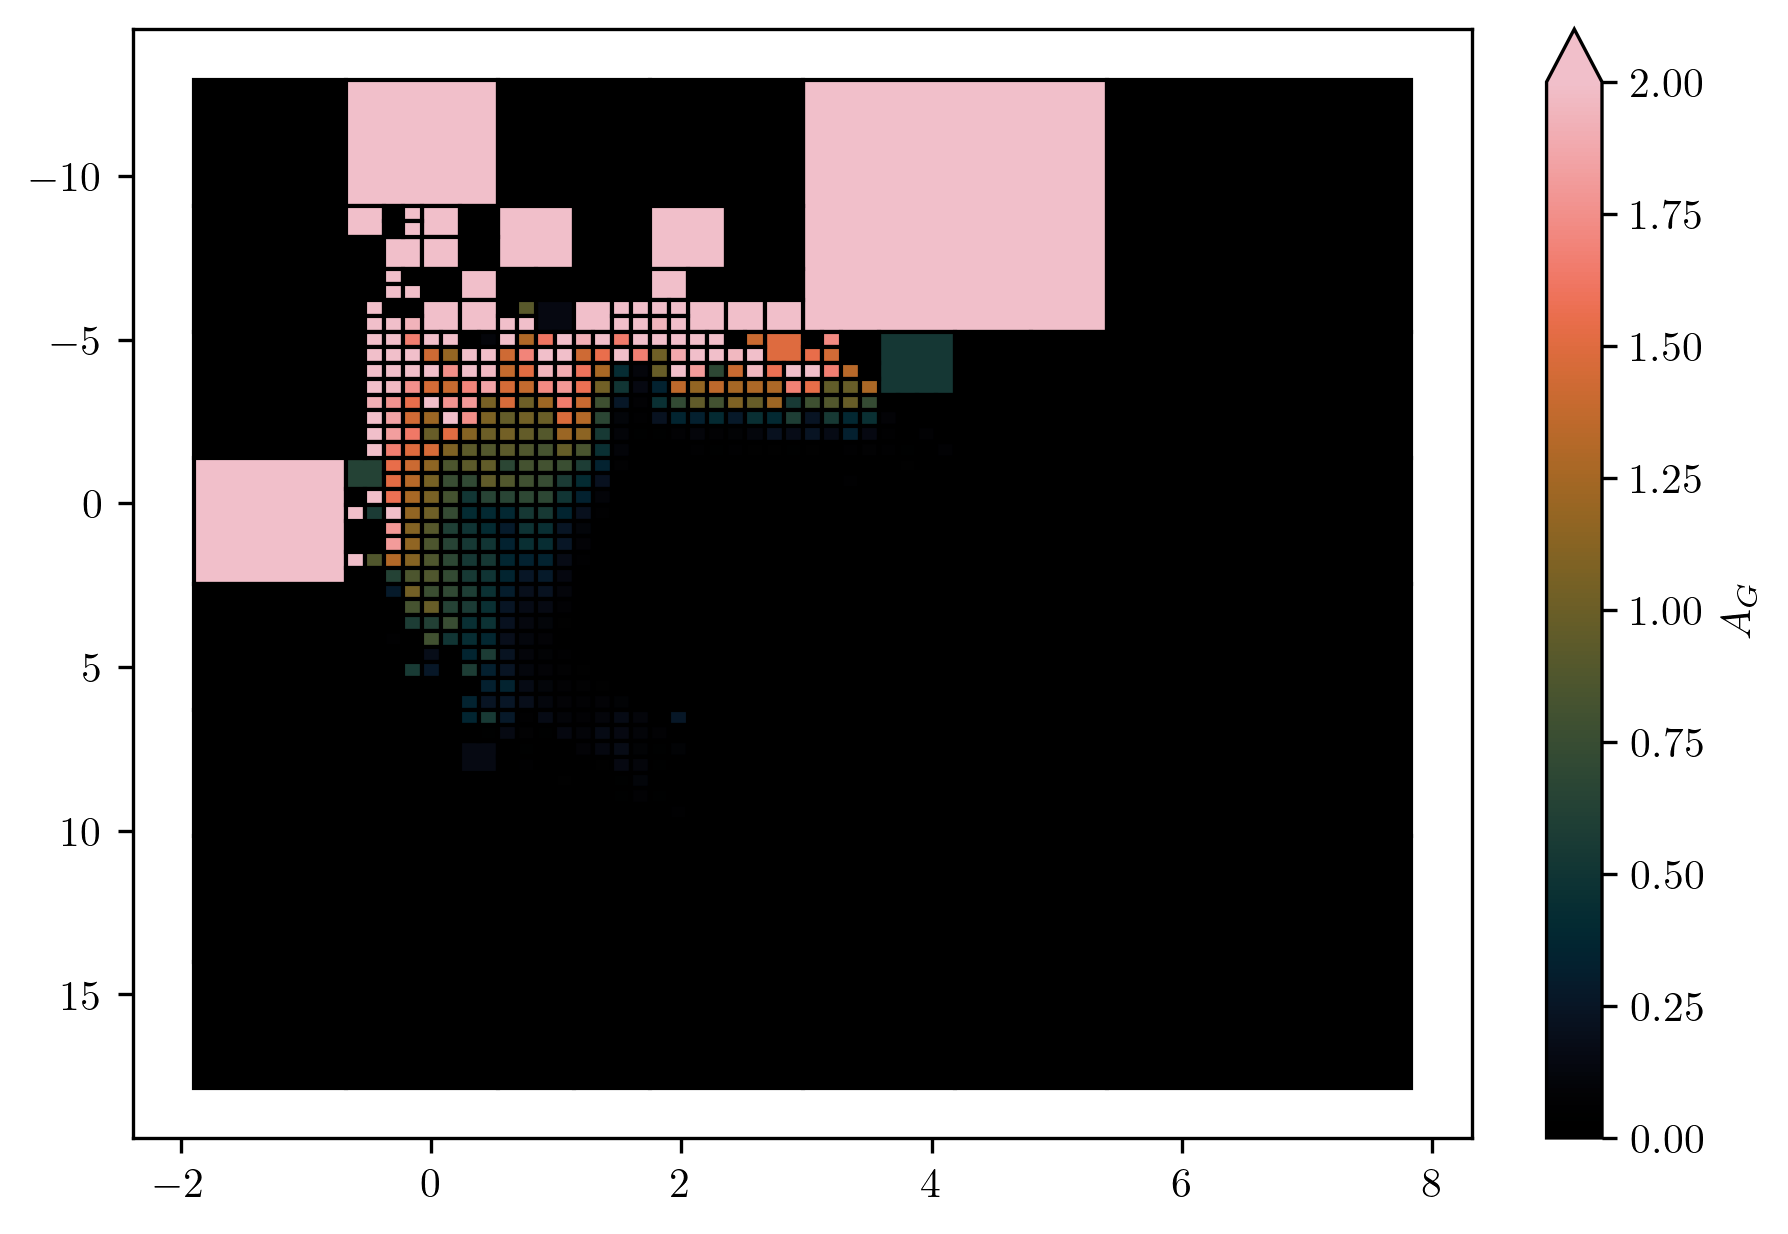

In [19]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.scatter(clean['bp_rp_0'], clean['M_G'], alpha=0, rasterized=True)

ag_cmap = cmr.dusk
ag_norm = plt.Normalize(vmin=0,vmax=2)

for k in range(len(num)):
    this = ((clean['bp_rp_0'] > xmin[k]) & 
            (clean['bp_rp_0'] < xmax[k]) & 
            (clean['M_G'] < ymax[k]) & 
            (clean['M_G'] > ymin[k]))
    c = clean[this]['ag_gspphot'].mean()
    if np.isnan(c):
        c = 0
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc = ag_cmap(ag_norm(c)), ec='k', rasterized=True))
ax.invert_yaxis()
plt.colorbar(cm.ScalarMappable(norm=ag_norm, cmap=ag_cmap), fraction=0.05, label=r'$A_G$', extend='max')

/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


(17.847580213969007, -12.940513247146765)

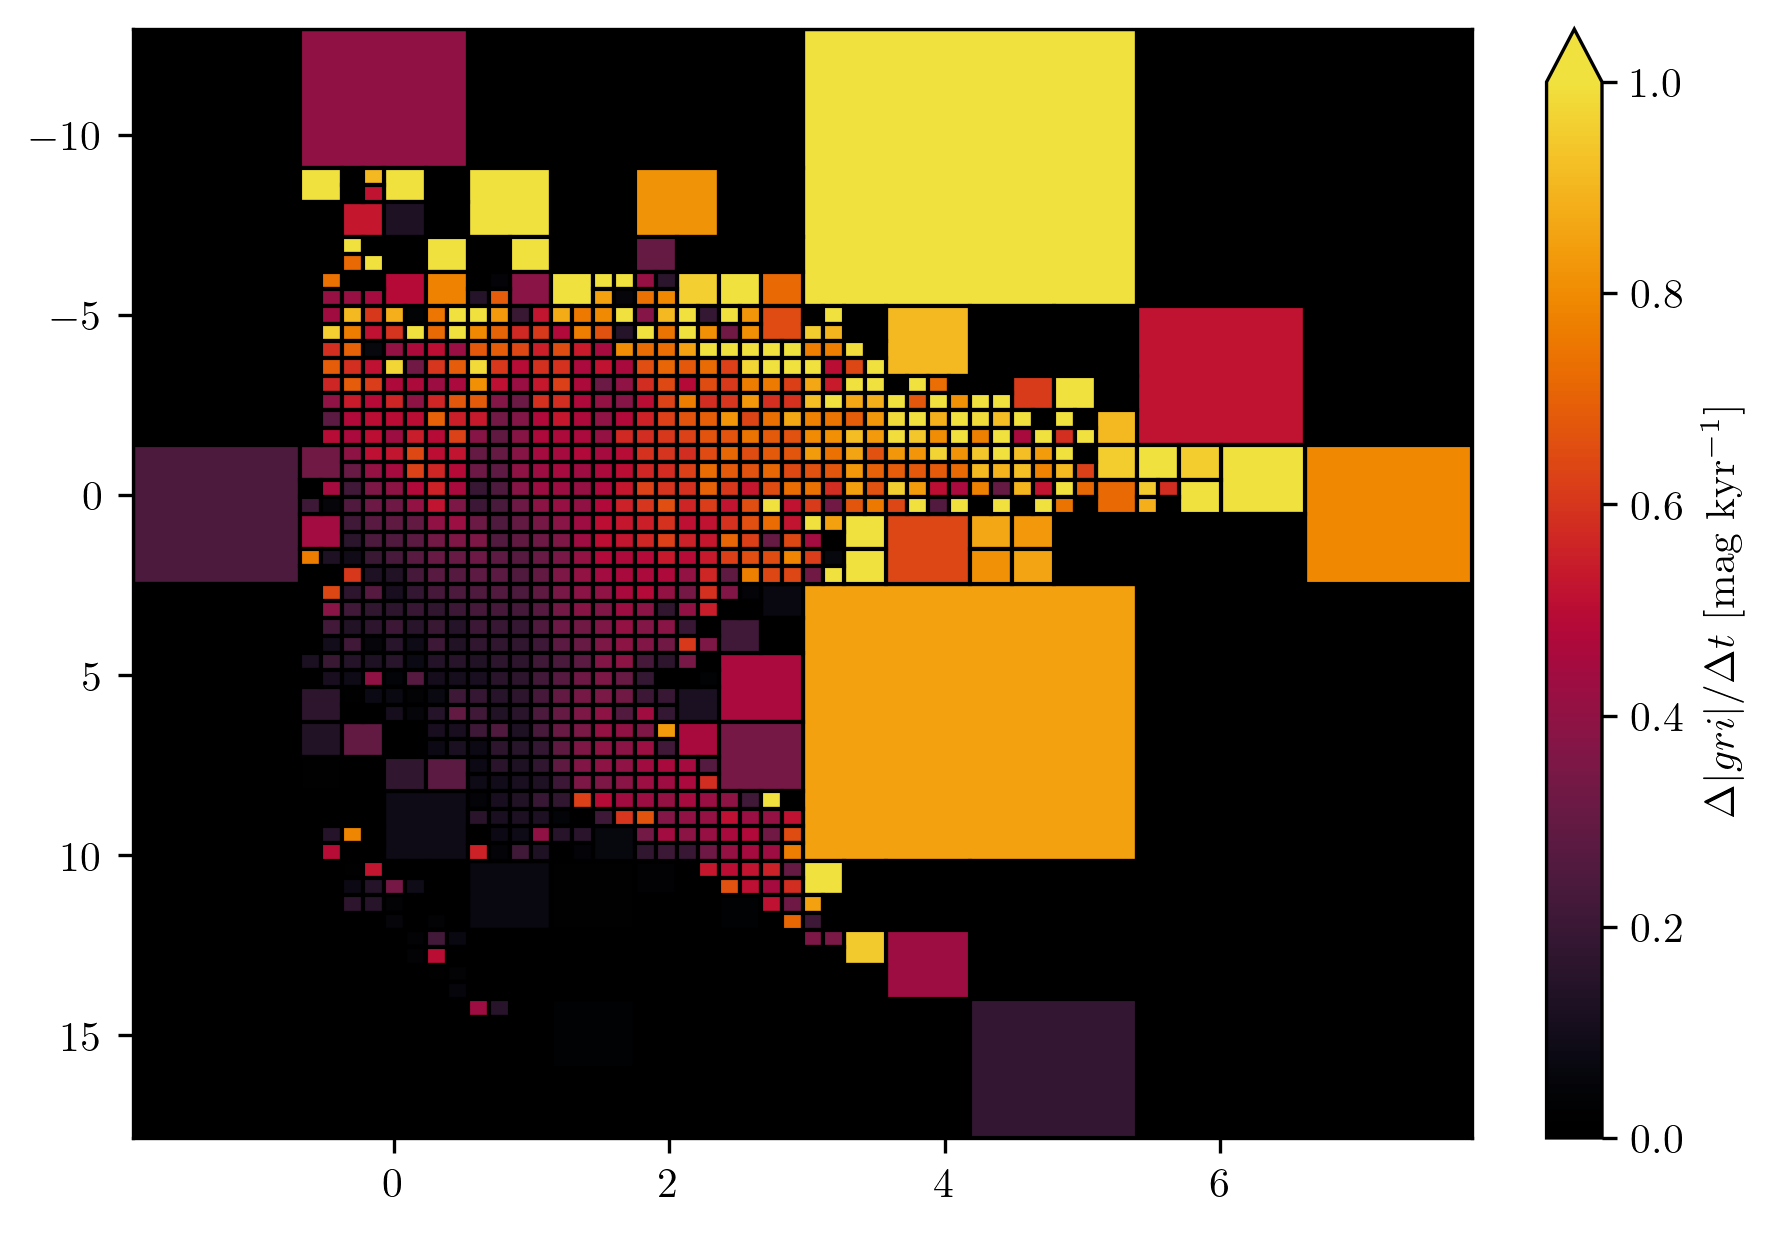

In [20]:
# Delta band per kyr in bin
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.scatter(clean['bp_rp_0'], clean['M_G'], alpha=0, rasterized=True)

dm_cmap = cmr.ember
dm_norm = plt.Normalize(vmin=0,vmax=1)

for k in range(len(num)):
    this = ((clean['bp_rp_0'] > xmin[k]) & 
            (clean['bp_rp_0'] < xmax[k]) & 
            (clean['M_G'] < ymax[k]) & 
            (clean['M_G'] > ymin[k]))
    c = np.nanmean(np.sqrt(np.array([clean[this][f'Delta_{band}_per_kyr'].values**2.0 for band in ['g','r','i']]).sum(axis=0)))
    if np.isnan(c):
        c = 0
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc = dm_cmap(dm_norm(c)), ec='k', rasterized=True))
    
plt.colorbar(cm.ScalarMappable(norm=dm_norm, cmap=dm_cmap), fraction=0.05, label='$\Delta|gri|/\Delta t$ [mag kyr$^{-1}$]', extend='max')
ax.set_xlim(xmin.min(),xmax.max())
ax.set_ylim(ymax.max(),ymin.min())

(17.847580213969007, -12.940513247146765)

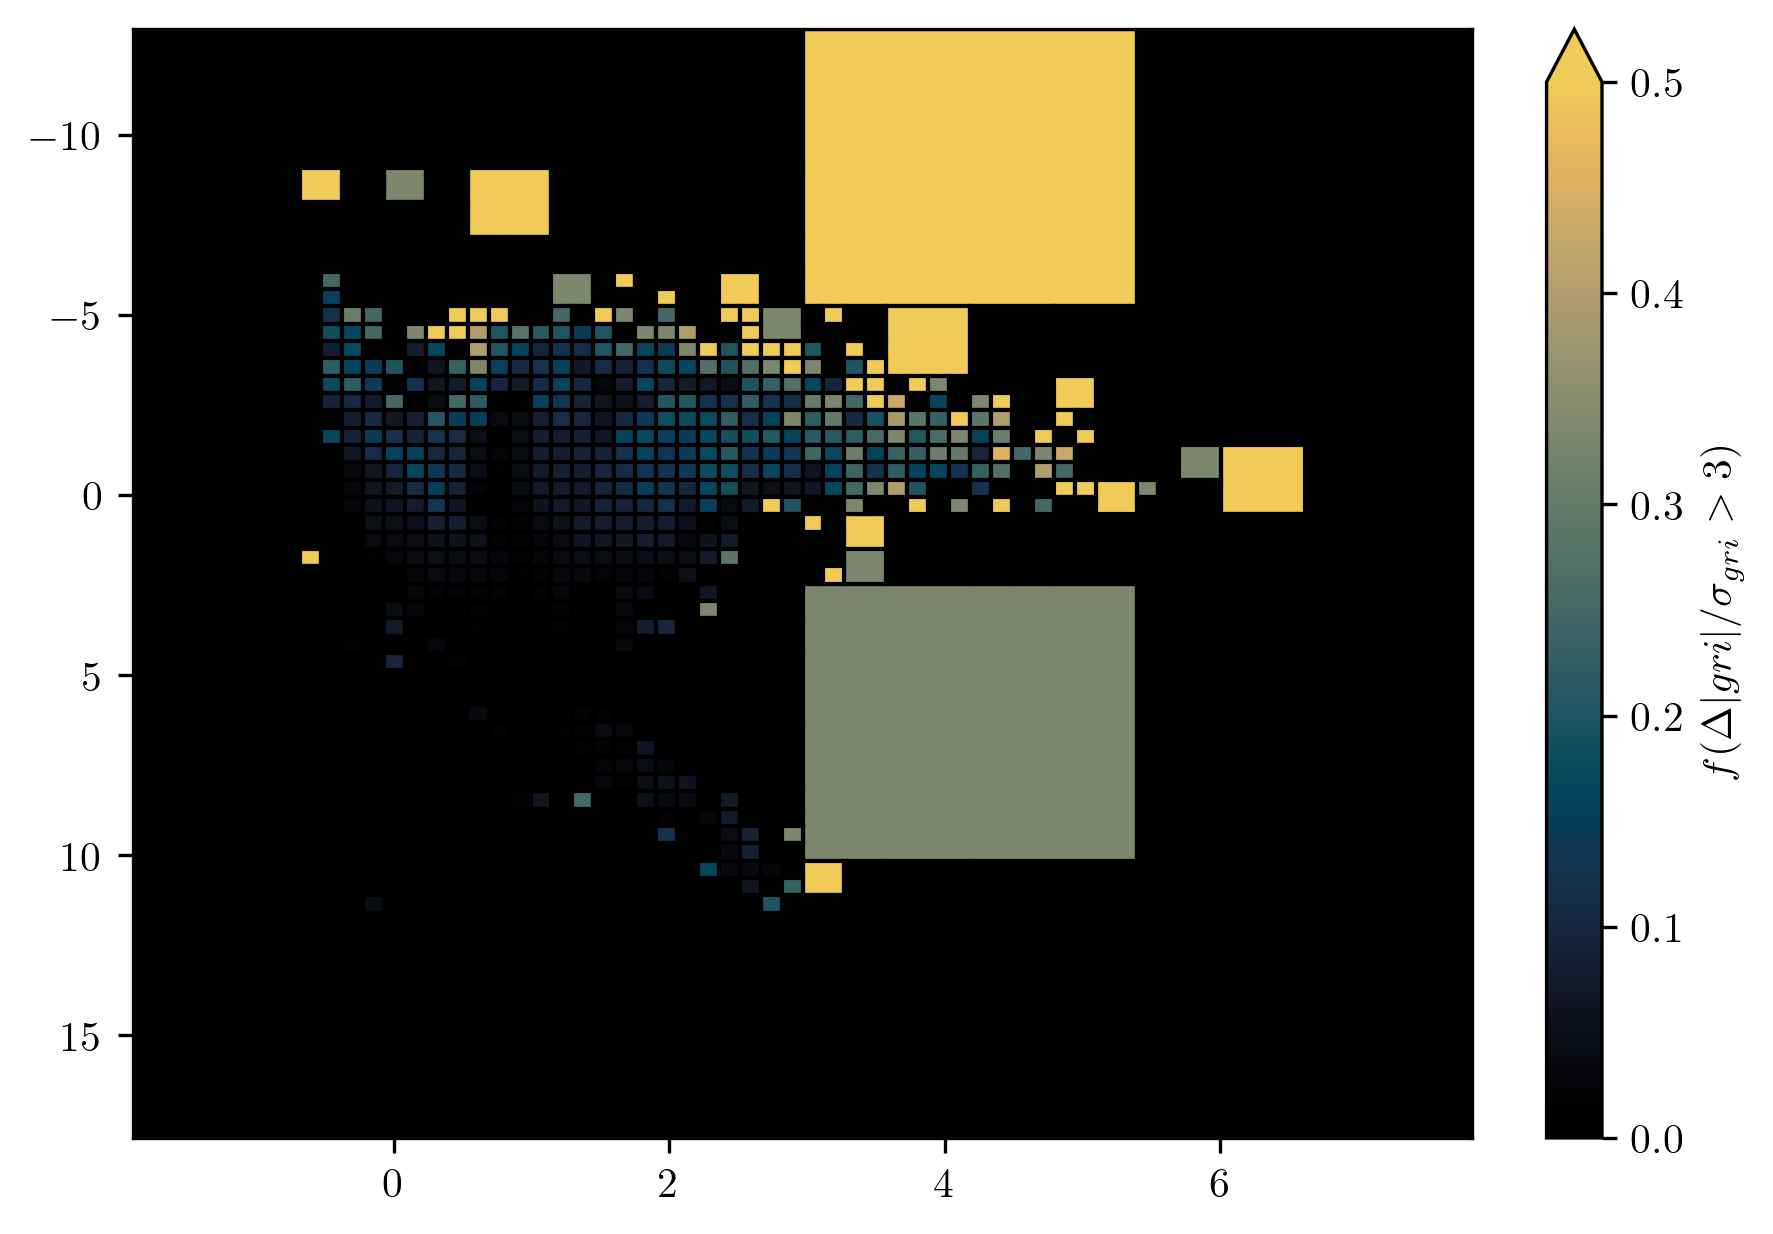

In [21]:
# fraction above 3sig
X_all = np.sqrt(np.array([clean[f'Delta_{band}_per_kyr'].values**2.0 for band in ['g','r','i']]).sum(axis=0))
mu = X_all.mean()
sig = X_all.std()

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.scatter(clean['bp_rp_0'], clean['M_G'], alpha=0, rasterized=True)

fdm_cmap = cmr.get_sub_cmap('cmr.eclipse',0,0.9)
fdm_norm = plt.Normalize(vmin=0,vmax=0.5)

for k in range(len(num)):
    this = ((clean['bp_rp_0'] > xmin[k]) & 
            (clean['bp_rp_0'] < xmax[k]) & 
            (clean['M_G'] < ymax[k]) & 
            (clean['M_G'] > ymin[k]))
    X = np.sqrt(np.array([clean[this][f'Delta_{band}_per_kyr'].values**2.0 for band in ['g','r','i']]).sum(axis=0))
    Z = np.abs((X - mu)/sig)
    Z = Z[~np.isnan(Z)]
    if len(Z) == 0:
        c = 0
    else:
        c = len(Z[Z>3])/len(Z)
    if np.isnan(c):
        c = 0
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc = fdm_cmap(fdm_norm(c)), ec='k', rasterized=True))
    
plt.colorbar(cm.ScalarMappable(norm=fdm_norm, cmap=fdm_cmap), fraction=0.05, label='$f(\Delta|gri|/\sigma_{gri} > 3)$', extend='max')
ax.set_xlim(xmin.min(),xmax.max())
ax.set_ylim(ymax.max(),ymin.min())

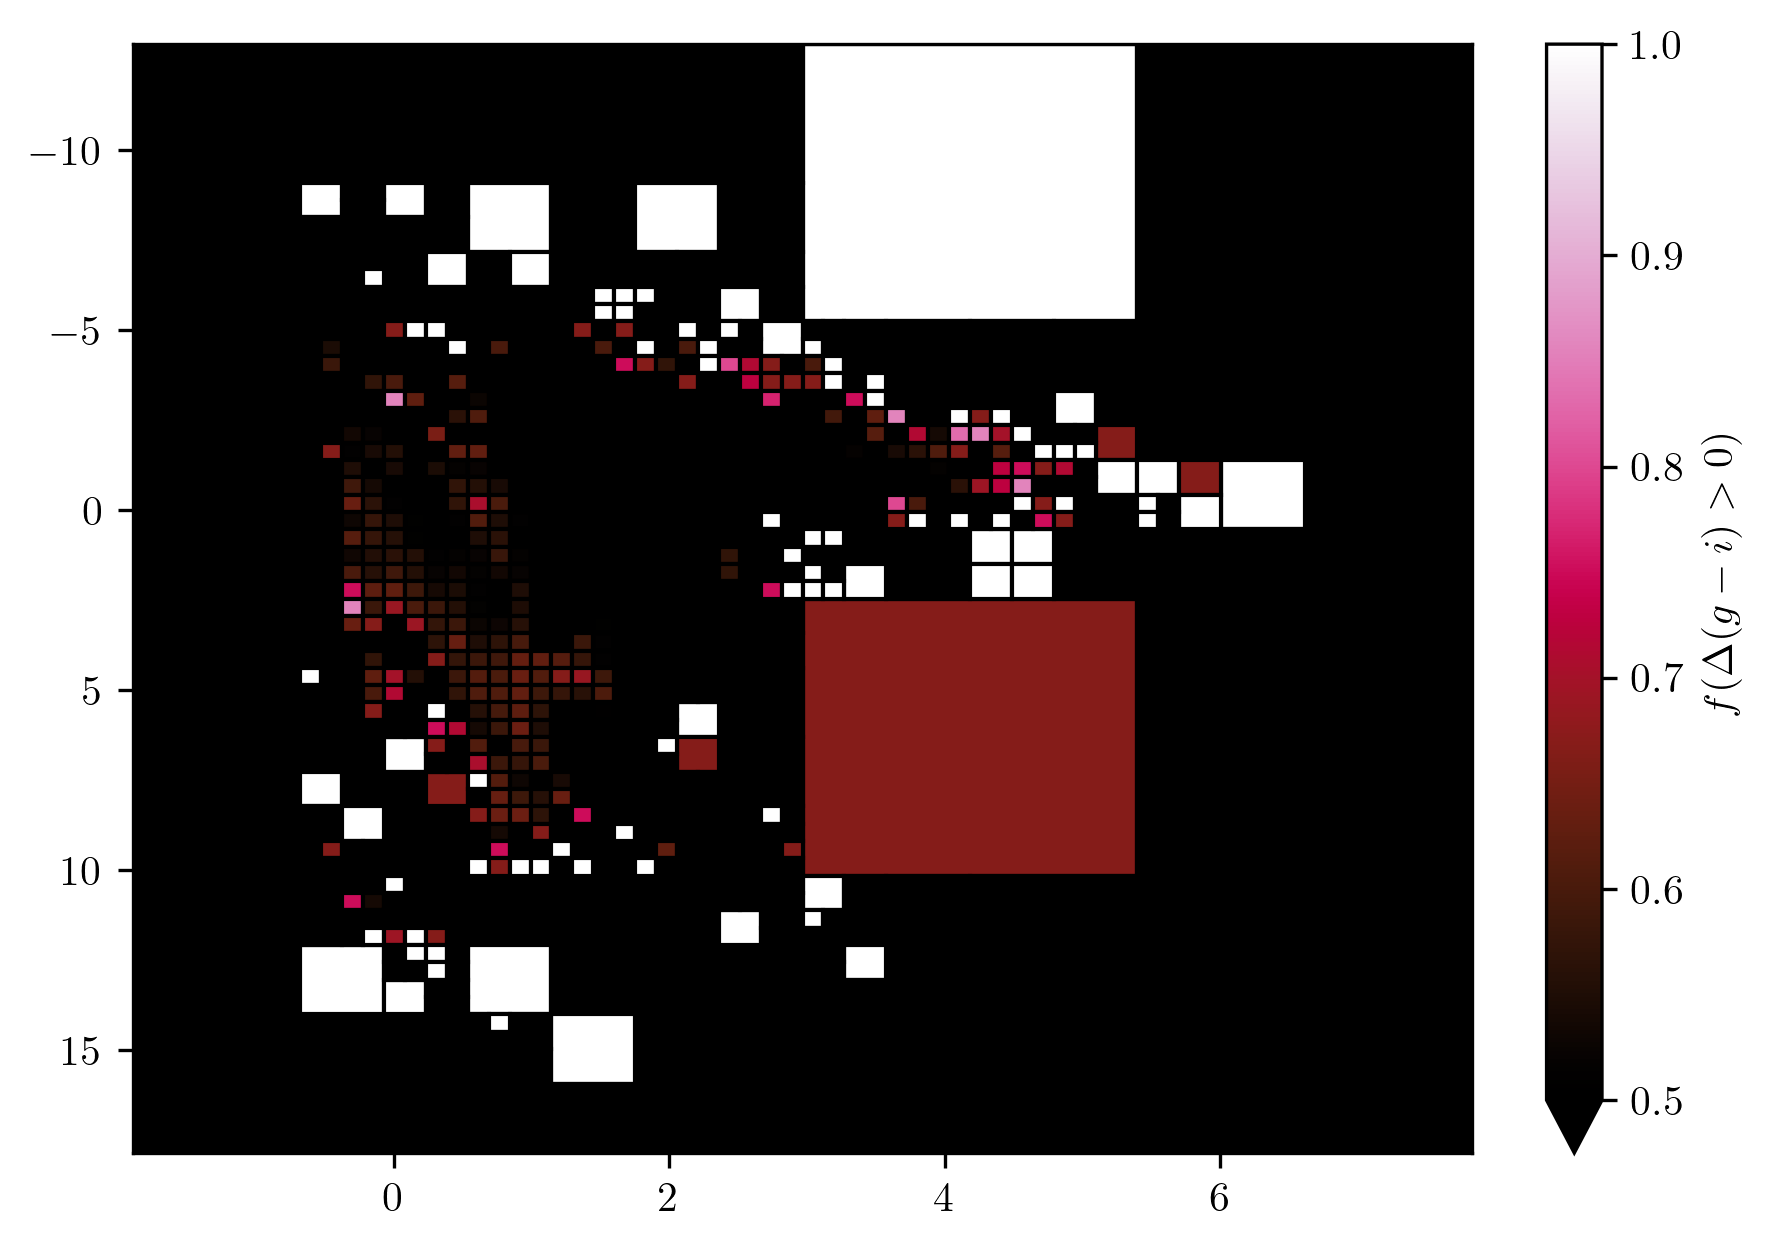

In [22]:
#f red
# fraction above 3sig
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.scatter(clean['bp_rp_0'], clean['M_G'], alpha=0, rasterized=True)

fred_cmap = cmr.flamingo
fred_norm = plt.Normalize(vmin=0.5,vmax=1)

d_gi = (clean['Sdss_mag_g'] - clean['Sdss_mag_i']) - (clean['g'] - clean['i'])

for k in range(len(num)):
    this = ((clean['bp_rp_0'] > xmin[k]) & 
            (clean['bp_rp_0'] < xmax[k]) & 
            (clean['M_G'] < ymax[k]) & 
            (clean['M_G'] > ymin[k]))
    X = d_gi[this]
    X = X[~np.isnan(X)]
    if len(X) == 0:
        c = 0
    else:
        X_pos = X[X>0]
        c = len(X_pos)/len(X)
    if np.isnan(c):
        c = 0
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc = fred_cmap(fred_norm(c)), ec='k', rasterized=True))
    
plt.colorbar(cm.ScalarMappable(norm=fred_norm, cmap=fred_cmap), fraction=0.05, label='$f(\Delta(g-i) > 0)$',extend='min')
ax.set_xlim(xmin.min(),xmax.max())
ax.set_ylim(ymax.max(),ymin.min())
plt.savefig('../plots/f_red.pdf', bbox_inches='tight')

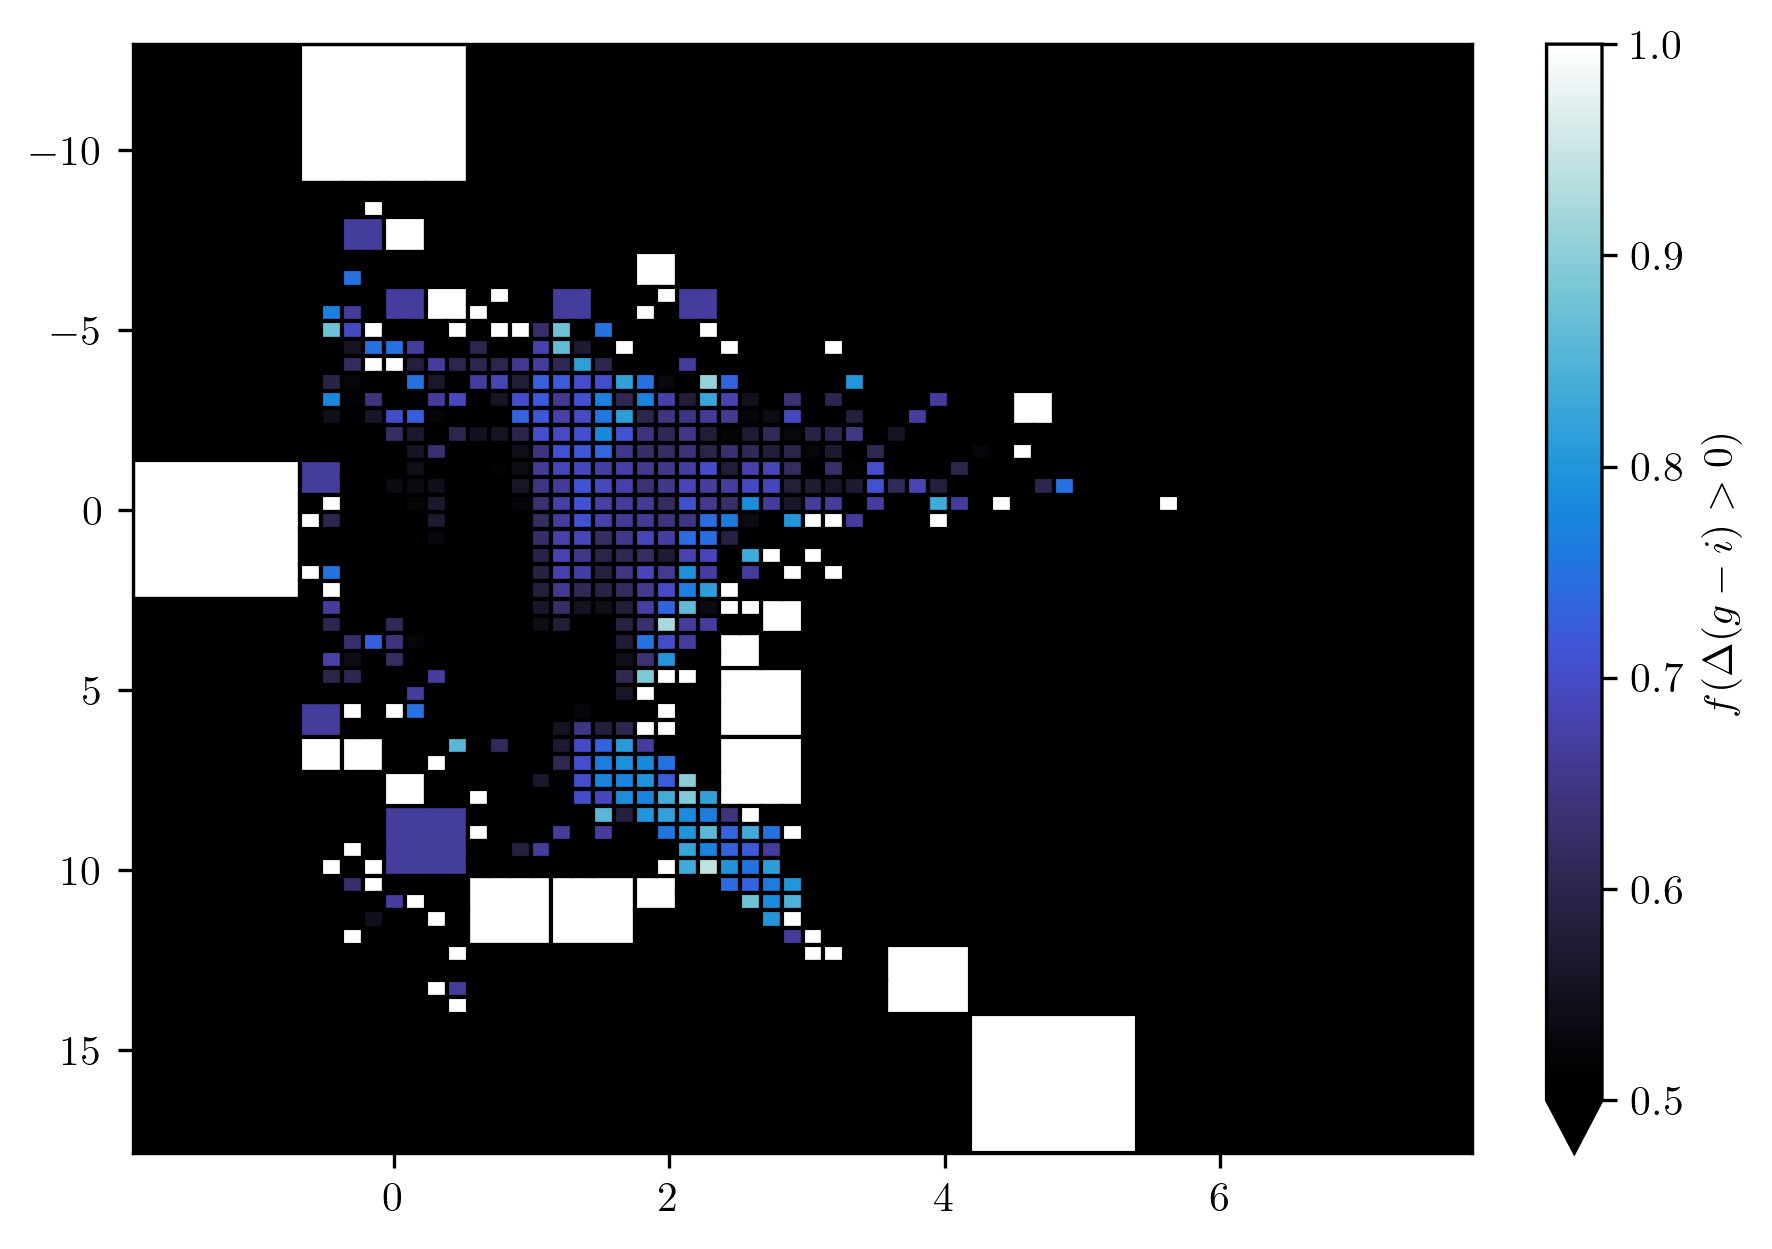

In [23]:
#f blue
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.scatter(clean['bp_rp_0'], clean['M_G'], alpha=0, rasterized=True)

fred_cmap = cmr.freeze
fred_norm = plt.Normalize(vmin=0.5,vmax=1)

for k in range(len(num)):
    this = ((clean['bp_rp_0'] > xmin[k]) & 
            (clean['bp_rp_0'] < xmax[k]) & 
            (clean['M_G'] < ymax[k]) & 
            (clean['M_G'] > ymin[k]))
    X = d_gi[this]
    X = X[~np.isnan(X)]
    if len(X) == 0:
        c = 0
    else:
        X_neg = X[X<0]
        c = len(X_neg)/len(X)
    if np.isnan(c):
        c = 0
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc = fred_cmap(fred_norm(c)), ec='k', rasterized=True))
    
plt.colorbar(cm.ScalarMappable(norm=fred_norm, cmap=fred_cmap), fraction=0.05, label='$f(\Delta(g-i) > 0)$',extend='min')
ax.set_xlim(xmin.min(),xmax.max())
ax.set_ylim(ymax.max(),ymin.min())
plt.savefig('../plots/f_blue.pdf', bbox_inches='tight')

/Users/carina/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


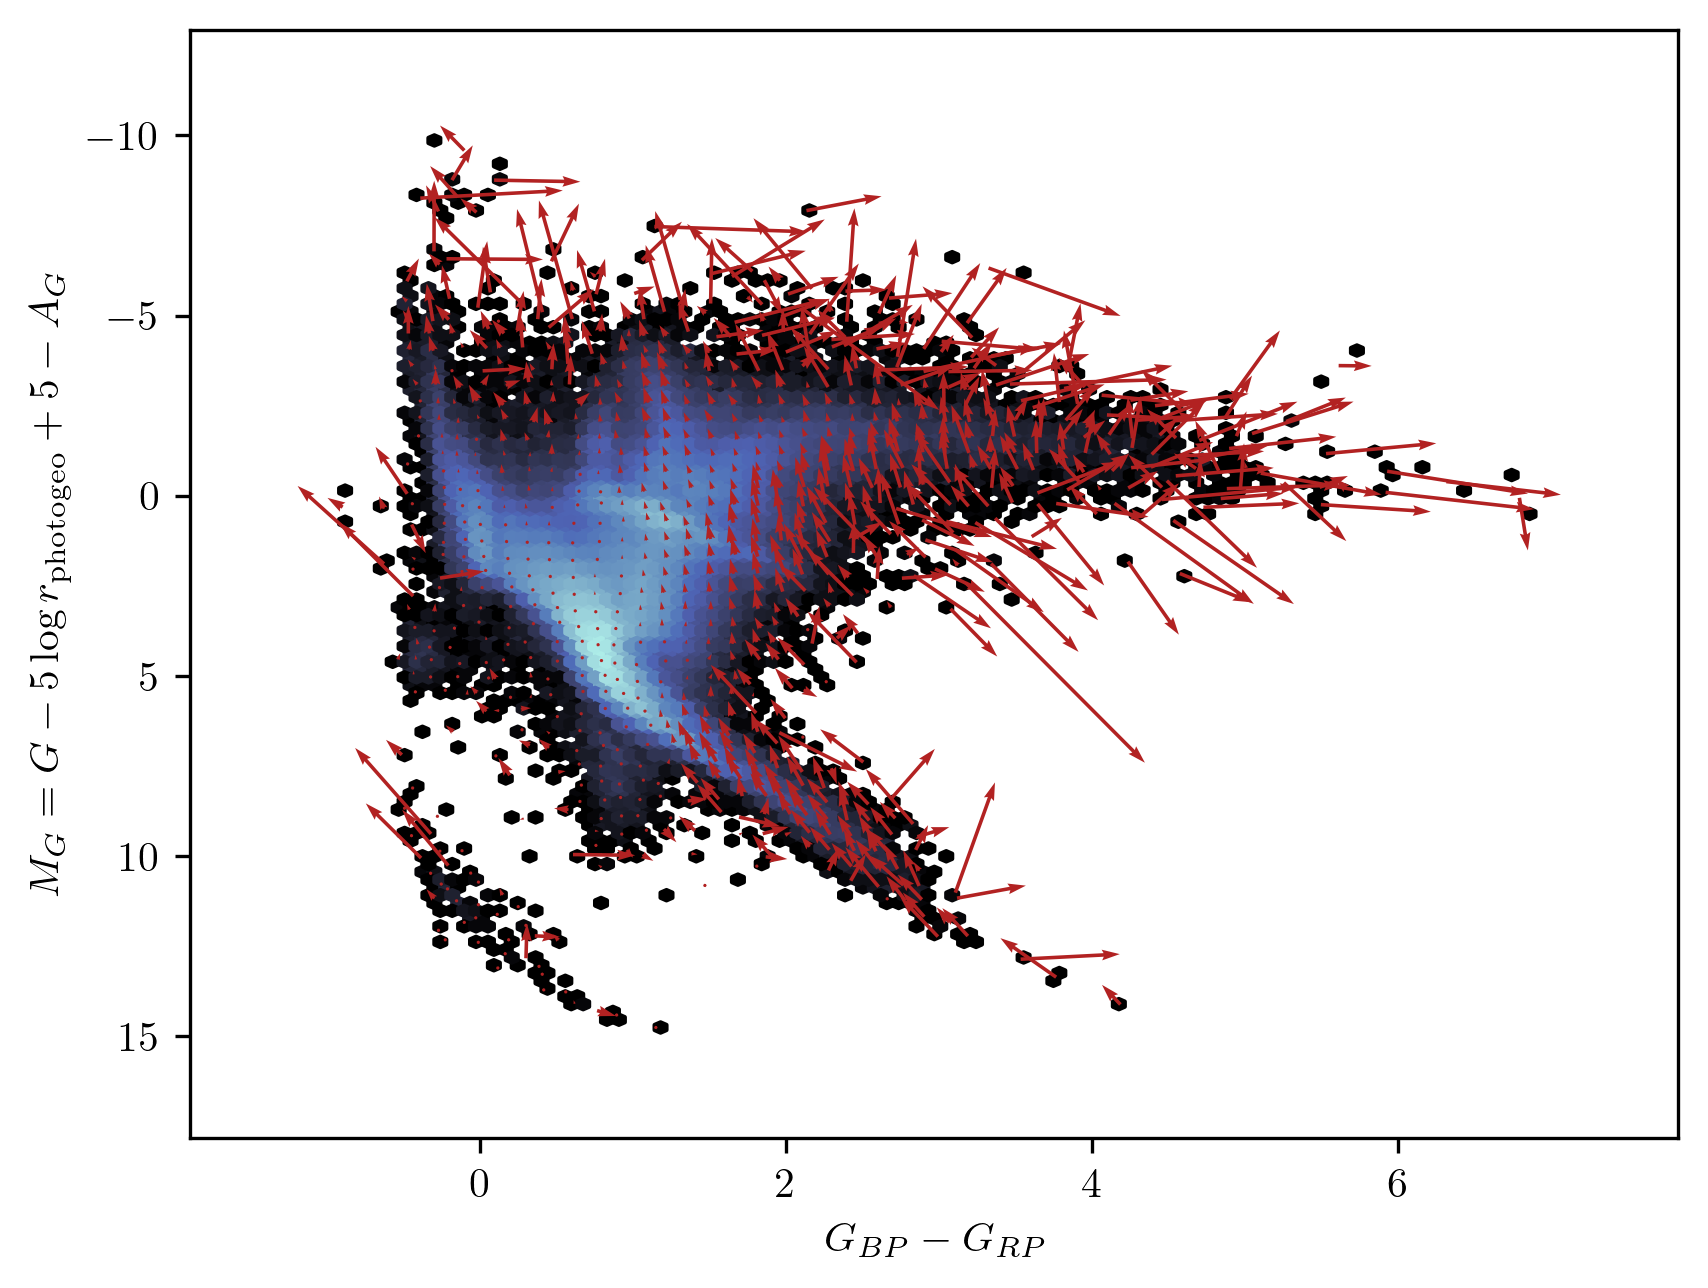

In [24]:
# The QUIVER
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

plt.hexbin(clean['bp_rp_0'], M_G, cmap='cmr.sapphire', mincnt=1, bins='log')

N_cmap = cmr.sapphire
N_norm = plt.Normalize(vmin=0,vmax=5)

dgi_per_kyr = clean[f'Delta_g_per_kyr'] - clean[f'Delta_i_per_kyr']

Xs = []
Ys = []
Us = []
Vs = []
for k in range(len(num)):
    this = ((clean['bp_rp_0'] > xmin[k]) & 
            (clean['bp_rp_0'] < xmax[k]) & 
            (clean['M_G'] < ymax[k]) & 
            (clean['M_G'] > ymin[k]))
    Xs.append(np.nanmedian(clean[this]['bp_rp_0']))
    Ys.append(np.nanmedian(clean[this]['M_G']))
    Us.append(np.nanmedian(dgi_per_kyr[this]))
    Vs.append(np.nanmedian(clean[this]['Delta_g_per_kyr']))
    
ax.set_xlim(xmin.min(),xmax.max())
ax.set_ylim(ymax.max(),ymin.min())

ax.quiver(Xs, Ys, Us, -np.array(Vs), zorder=10, fc='firebrick')

plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$M_G = G - 5\log r_{\rm photogeo} + 5 - A_G$')

plt.savefig('../plots/quiver_g_gi.pdf', bbox_inches='tight')

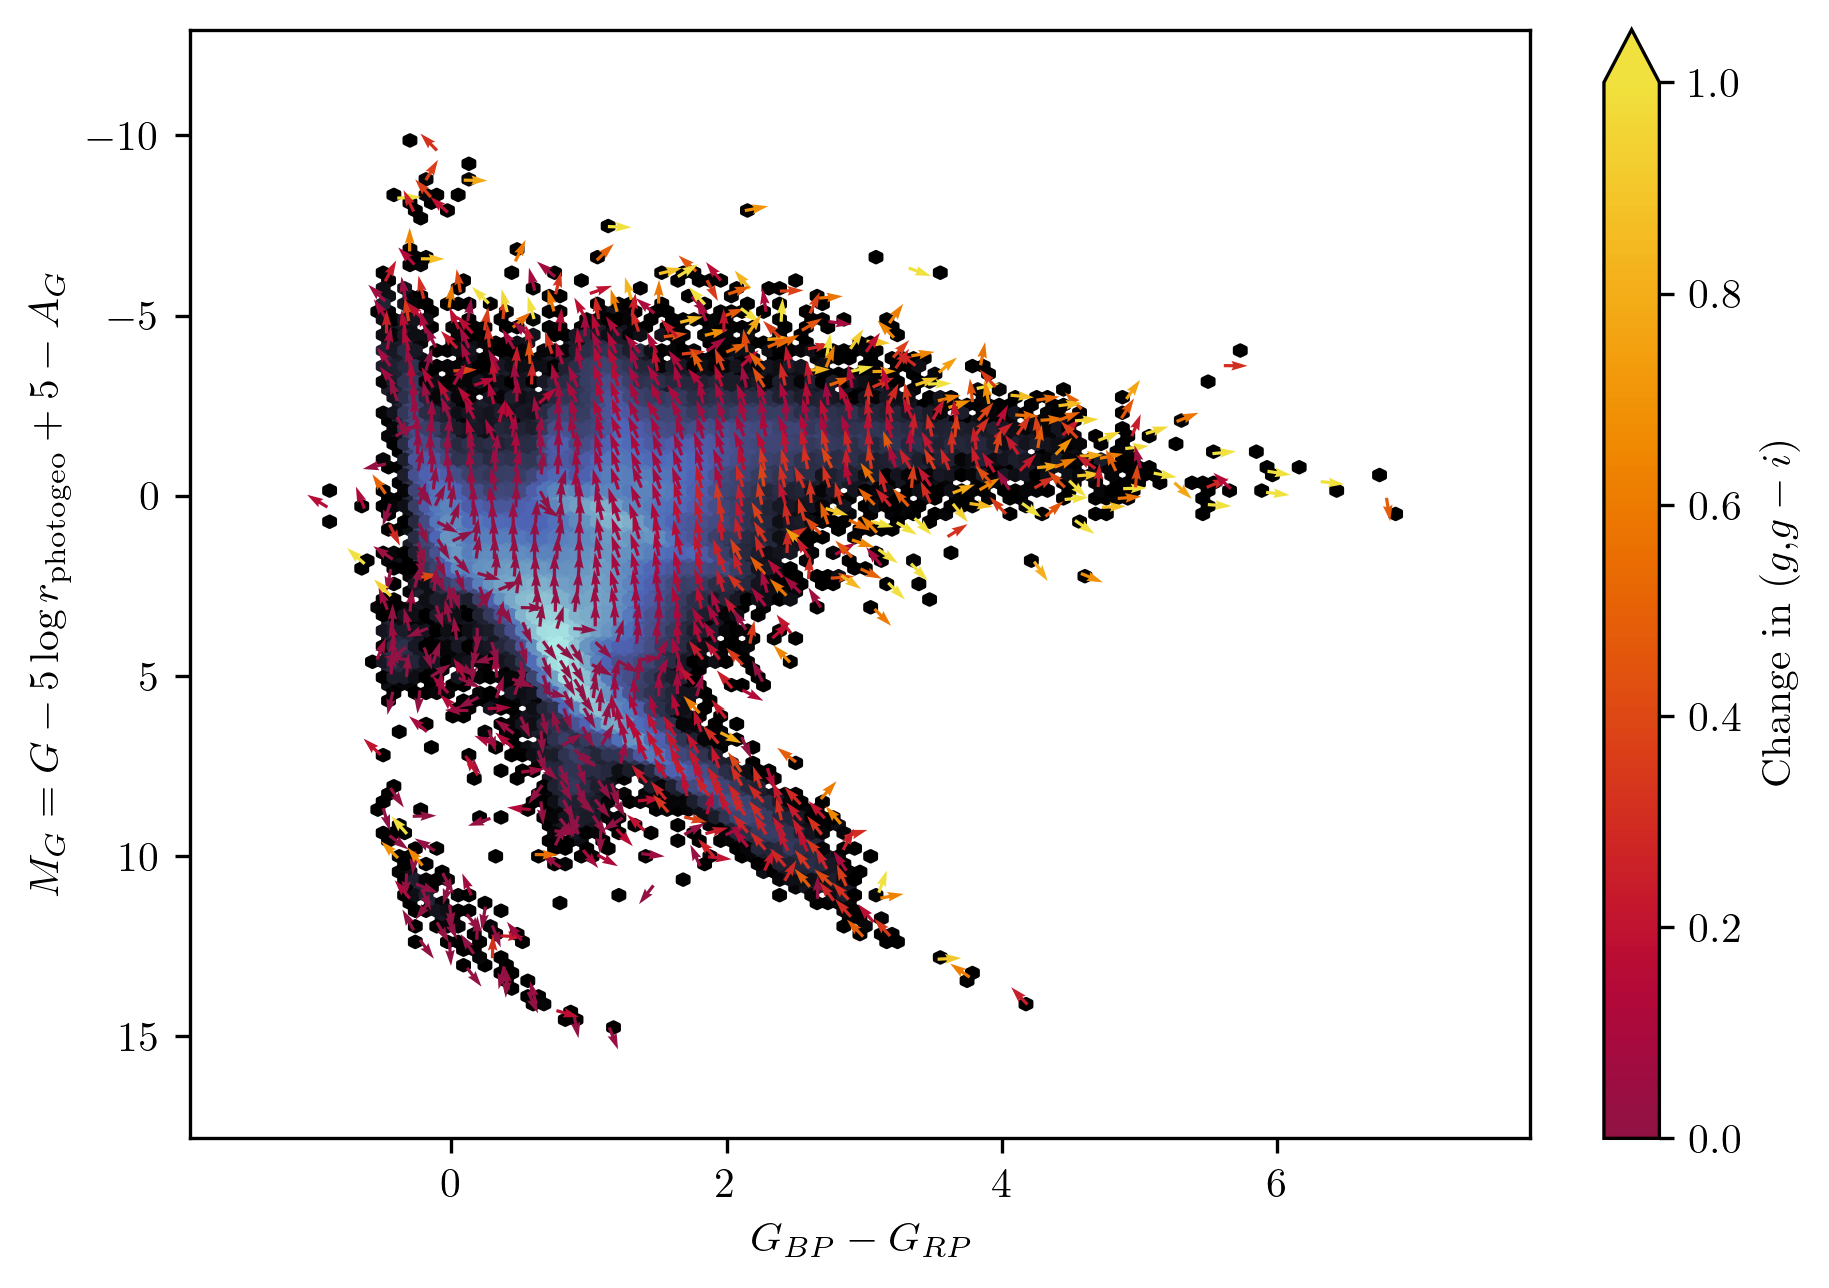

In [25]:
# The QUIVER

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

plt.hexbin(clean['bp_rp_0'], M_G, cmap='cmr.sapphire', mincnt=1, bins='log')

dm_cmap = cmr.get_sub_cmap('cmr.ember', 0.4, 1)

dgi_per_kyr = clean[f'Delta_g_per_kyr'] - clean[f'Delta_i_per_kyr']

Xs = []
Ys = []
Us = []
Vs = []
Cs = []
for k in range(len(num)):
    this = ((clean['bp_rp_0'] > xmin[k]) & 
            (clean['bp_rp_0'] < xmax[k]) & 
            (clean['M_G'] < ymax[k]) & 
            (clean['M_G'] > ymin[k]))
    Xs.append(np.nanmedian(clean[this]['bp_rp_0']))
    Ys.append(np.nanmedian(clean[this]['M_G']))
    
    
    u = np.nanmedian(dgi_per_kyr[this])
    v = -np.nanmedian(clean[this]['Delta_g_per_kyr'])
    length = np.sqrt(u**2.0 + v**2.0)
    
    Us.append(u/length)
    Vs.append(v/length)
    
    Cs.append(length)
    
ax.set_xlim(xmin.min(),xmax.max())
ax.set_ylim(ymax.max(),ymin.min())

ax.quiver(Xs, Ys, Us, Vs, Cs, cmap=dm_cmap, norm=dm_norm, zorder=10)

plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$M_G = G - 5\log r_{\rm photogeo} + 5 - A_G$')

plt.colorbar(cm.ScalarMappable(norm=dm_norm, cmap=dm_cmap), fraction=0.05, label='Change in ($g$,$g-i$)',extend='max')

plt.savefig('../plots/quiver_g_gi_scaled.pdf', bbox_inches='tight')

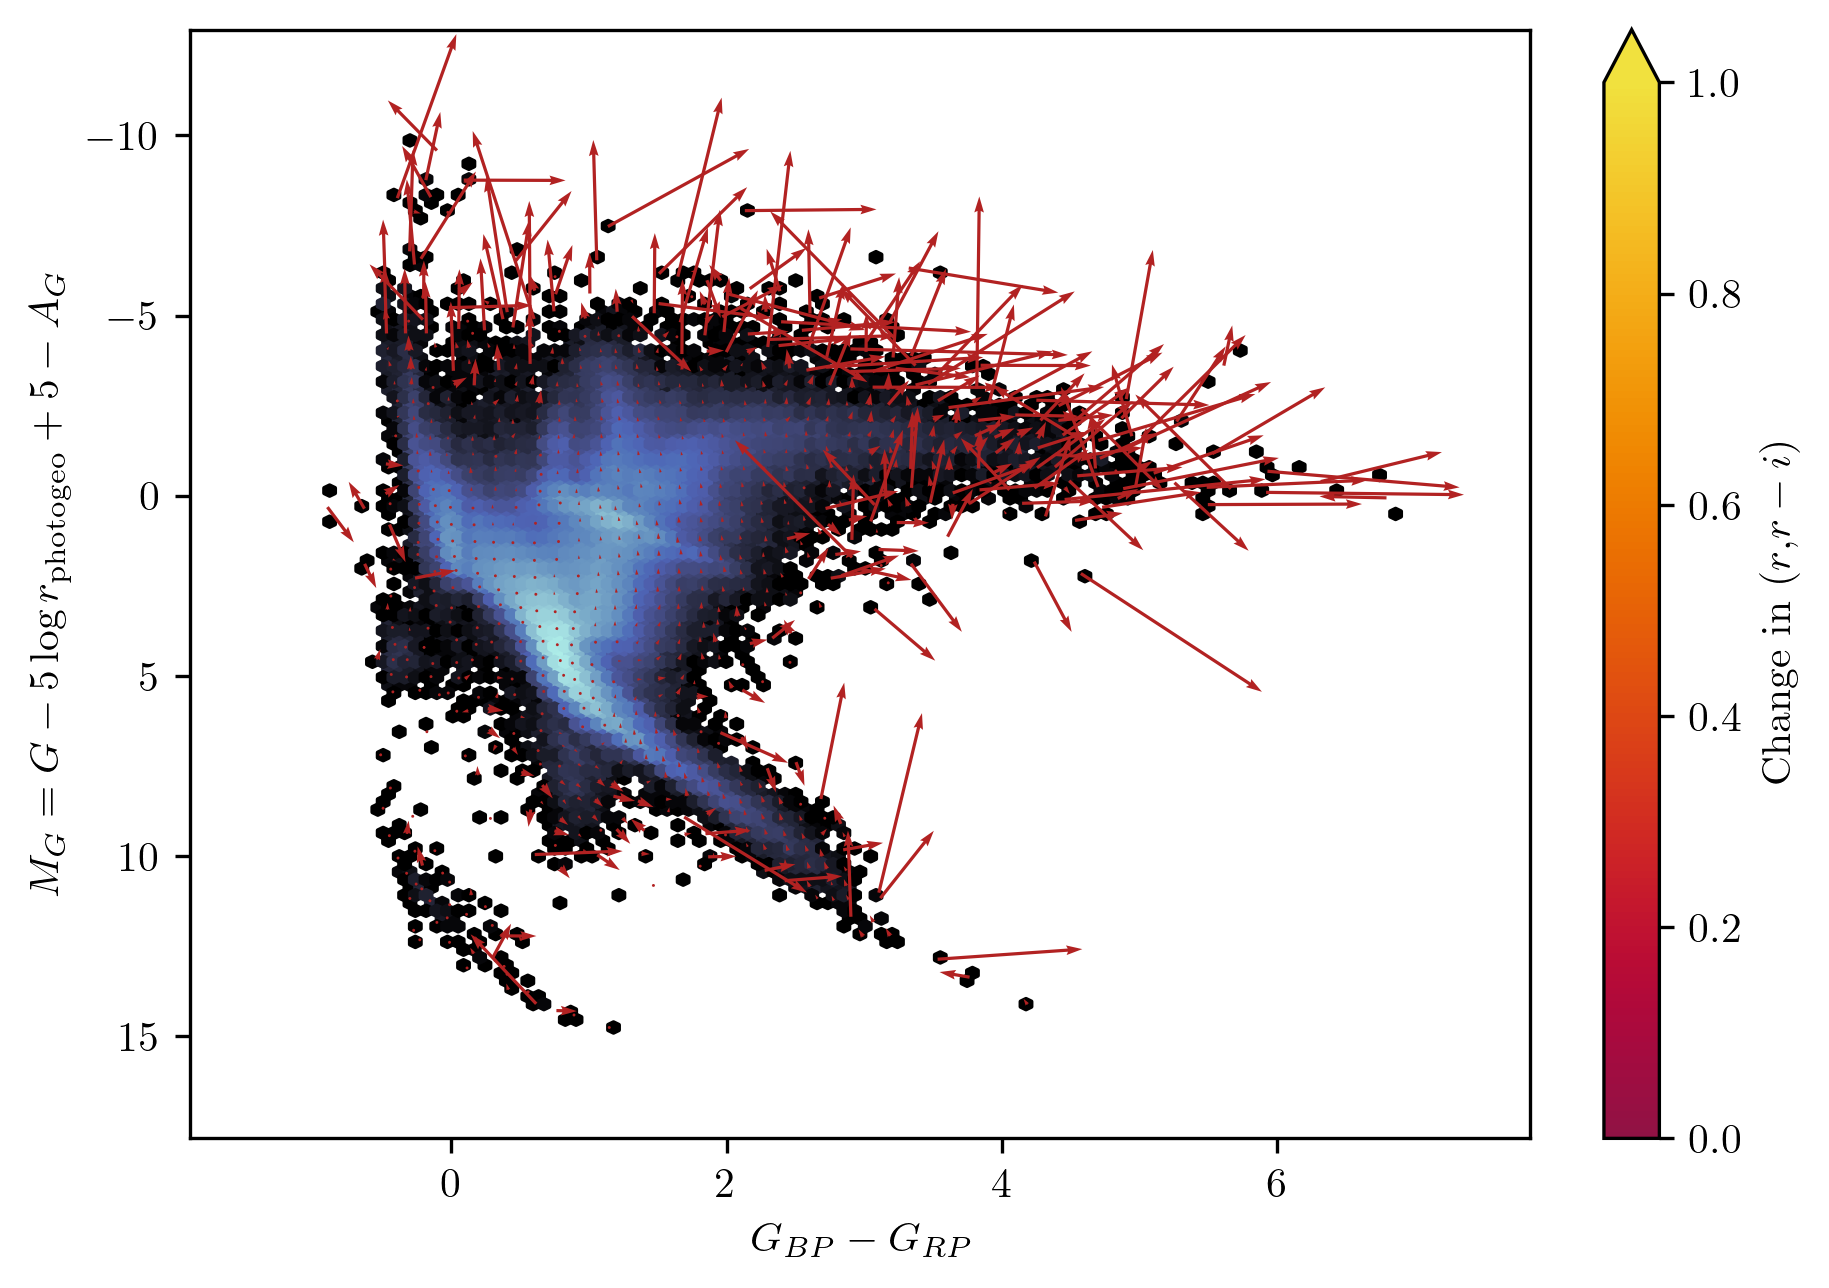

In [27]:
# The QUIVER
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

plt.hexbin(clean['bp_rp_0'], M_G, cmap='cmr.sapphire', mincnt=1, bins='log')

N_cmap = cmr.sapphire
N_norm = plt.Normalize(vmin=0,vmax=5)

dgi_per_kyr = clean[f'Delta_r_per_kyr'] - clean[f'Delta_i_per_kyr']

Xs = []
Ys = []
Us = []
Vs = []
for k in range(len(num)):
    this = ((clean['bp_rp_0'] > xmin[k]) & 
            (clean['bp_rp_0'] < xmax[k]) & 
            (clean['M_G'] < ymax[k]) & 
            (clean['M_G'] > ymin[k]))
    Xs.append(np.nanmedian(clean[this]['bp_rp_0']))
    Ys.append(np.nanmedian(clean[this]['M_G']))
    Us.append(np.nanmedian(dgi_per_kyr[this]))
    Vs.append(np.nanmedian(clean[this]['Delta_r_per_kyr']))
    
ax.set_xlim(xmin.min(),xmax.max())
ax.set_ylim(ymax.max(),ymin.min())

ax.quiver(Xs, Ys, Us, -np.array(Vs), zorder=10, fc='firebrick')

plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$M_G = G - 5\log r_{\rm photogeo} + 5 - A_G$')

plt.colorbar(cm.ScalarMappable(norm=dm_norm, cmap=dm_cmap), fraction=0.05, label='Change in ($r$,$r-i$)',extend='max')

plt.savefig('../plots/quiver_r_ri.pdf', bbox_inches='tight')

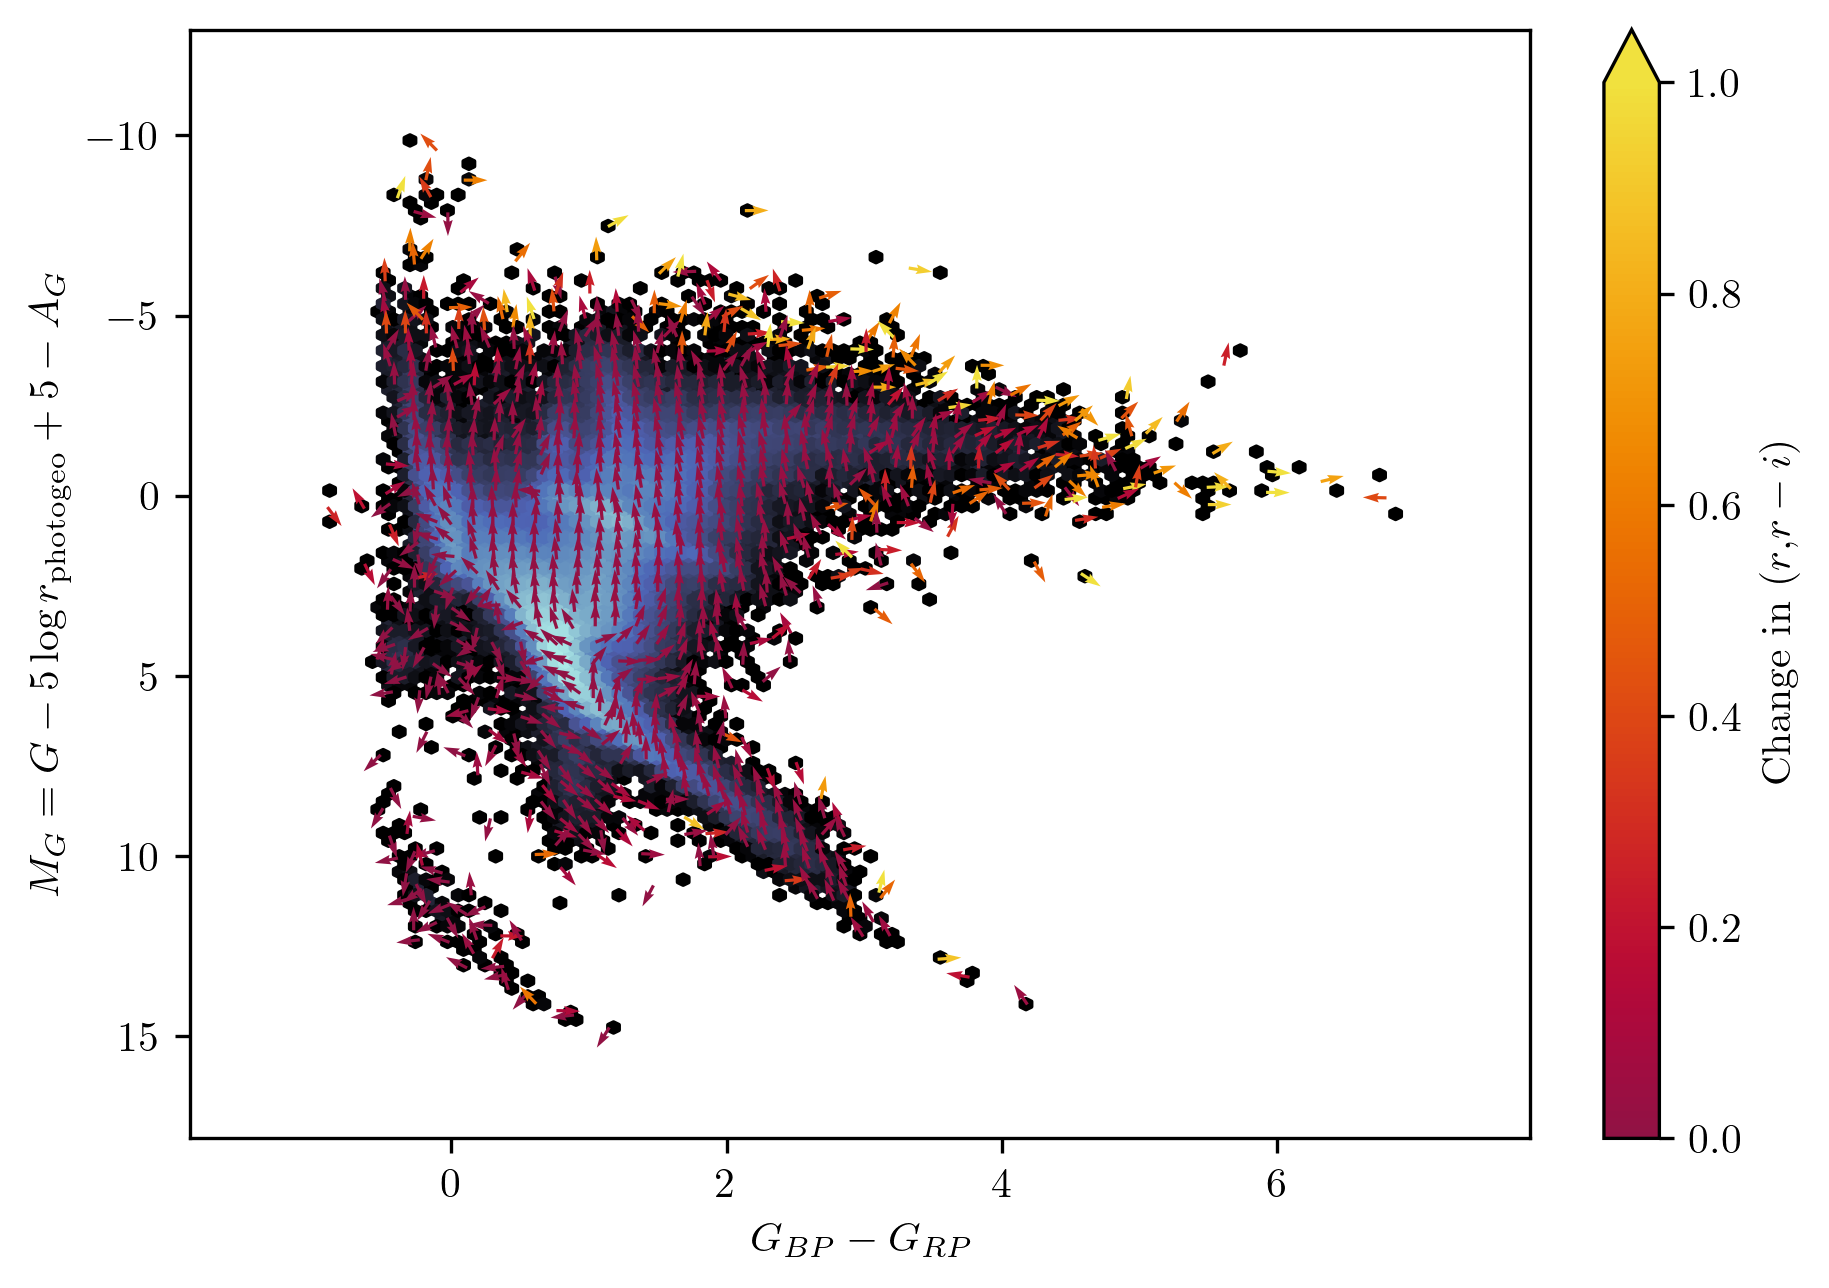

In [28]:
# The QUIVER
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

plt.hexbin(clean['bp_rp_0'], M_G, cmap='cmr.sapphire', mincnt=1, bins='log')

dm_cmap = cmr.get_sub_cmap('cmr.ember', 0.4, 1)

dgi_per_kyr = clean[f'Delta_r_per_kyr'] - clean[f'Delta_i_per_kyr']

Xs = []
Ys = []
Us = []
Vs = []
Cs = []
for k in range(len(num)):
    this = ((clean['bp_rp_0'] > xmin[k]) & 
            (clean['bp_rp_0'] < xmax[k]) & 
            (clean['M_G'] < ymax[k]) & 
            (clean['M_G'] > ymin[k]))
    Xs.append(np.nanmedian(clean[this]['bp_rp_0']))
    Ys.append(np.nanmedian(clean[this]['M_G']))
    
    
    u = np.nanmedian(dgi_per_kyr[this])
    v = -np.nanmedian(clean[this]['Delta_r_per_kyr'])
    length = np.sqrt(u**2.0 + v**2.0)
    
    Us.append(u/length)
    Vs.append(v/length)
    
    Cs.append(length)
    
ax.set_xlim(xmin.min(),xmax.max())
ax.set_ylim(ymax.max(),ymin.min())

ax.quiver(Xs, Ys, Us, Vs, Cs, cmap=dm_cmap, norm=dm_norm, zorder=10)

plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$M_G = G - 5\log r_{\rm photogeo} + 5 - A_G$')

plt.colorbar(cm.ScalarMappable(norm=dm_norm, cmap=dm_cmap), fraction=0.05, label='Change in ($r$,$r-i$)',extend='max')

plt.savefig('../plots/quiver_r_ri_scaled.pdf', bbox_inches='tight')

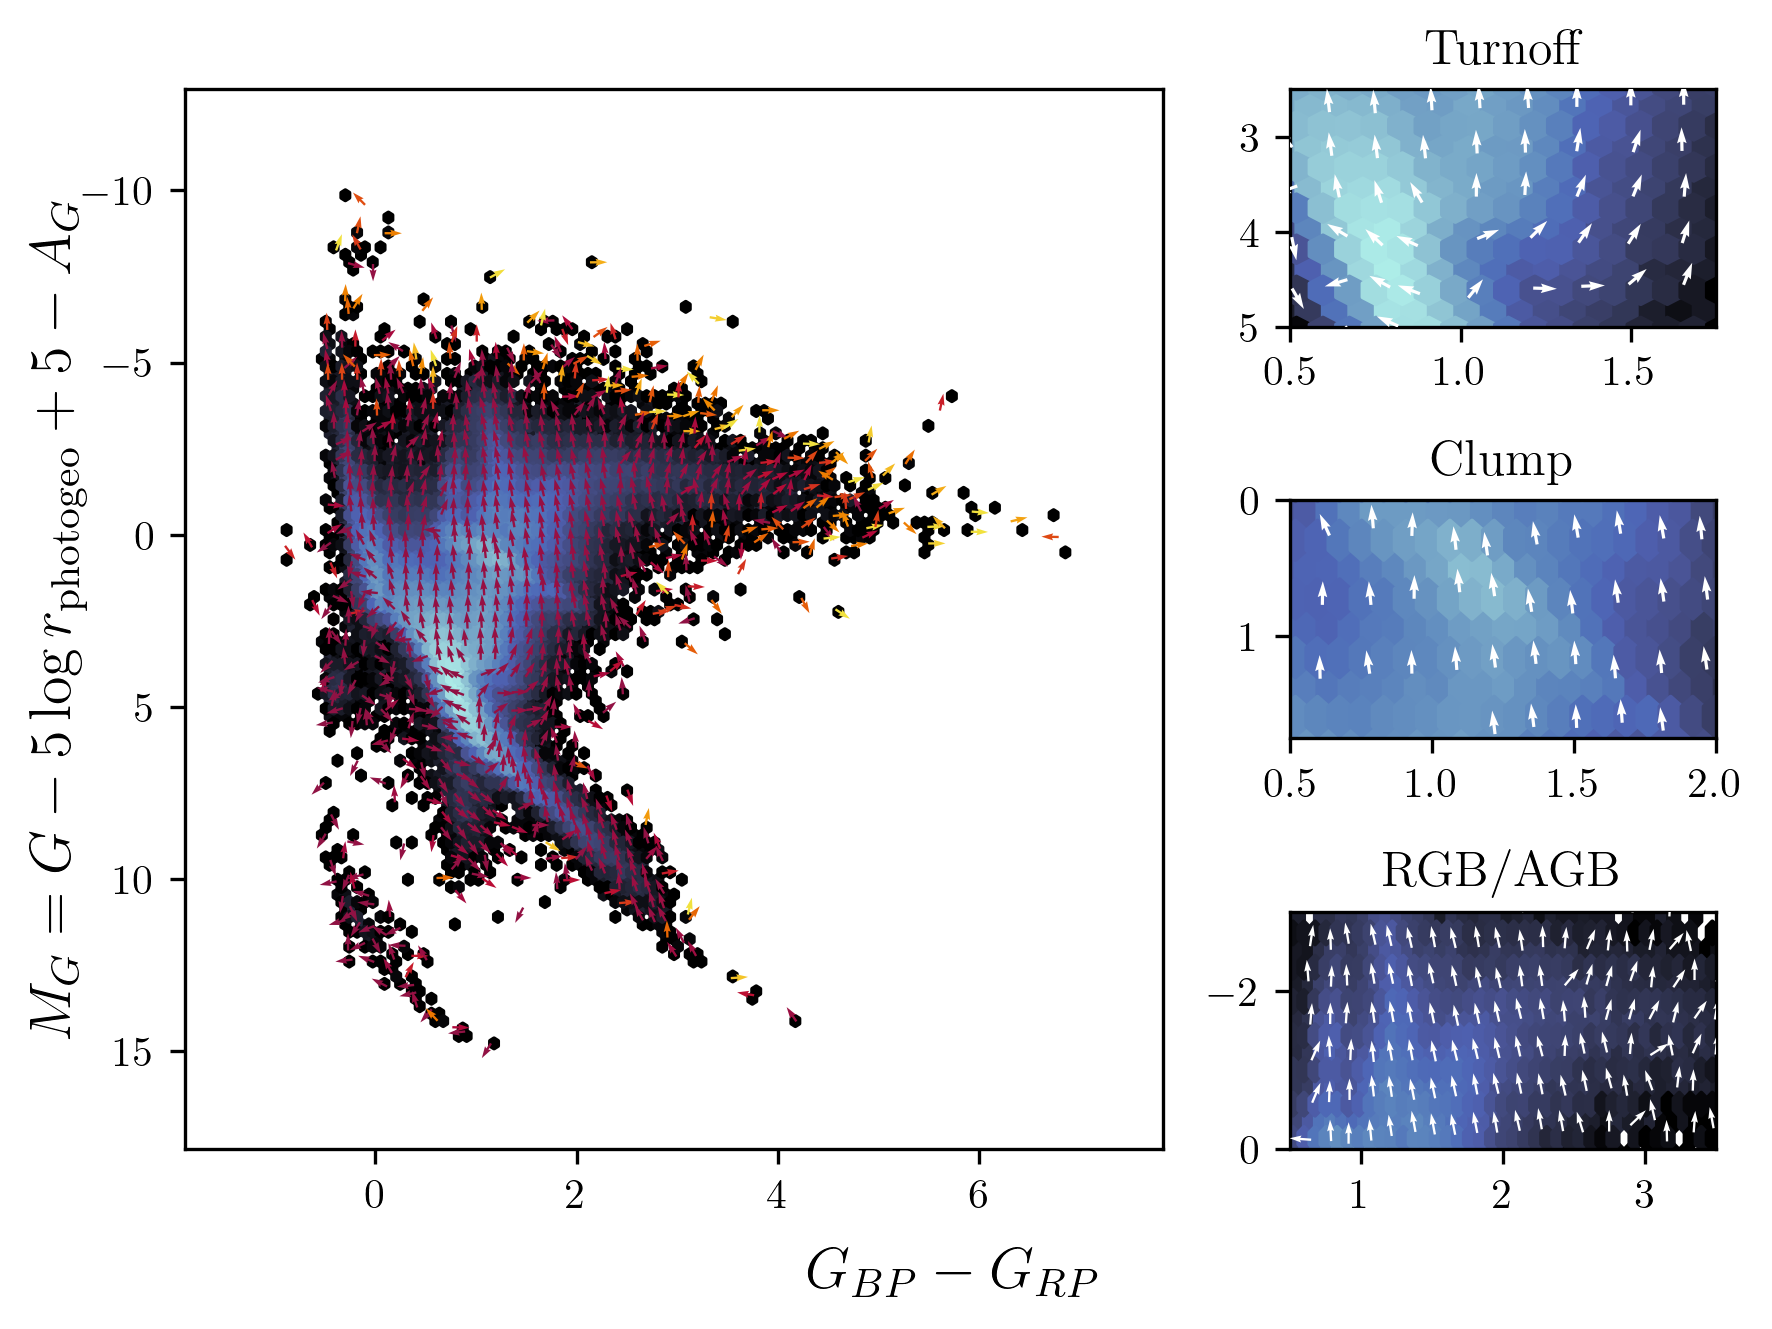

In [77]:
# The QUIVER
mosaic = """
AAAAAABBB
AAAAAABBB
AAAAAACCC
AAAAAACCC
AAAAAADDD
AAAAAADDD
"""

fig, ax = plt.subplot_mosaic(mosaic, dpi=300)

ax['A'].hexbin(clean['bp_rp_0'], M_G, cmap='cmr.sapphire', mincnt=1, bins='log')
ax['B'].hexbin(clean['bp_rp_0'], M_G, cmap='cmr.sapphire', mincnt=1, bins='log')
ax['C'].hexbin(clean['bp_rp_0'], M_G, cmap='cmr.sapphire', mincnt=1, bins='log')
ax['D'].hexbin(clean['bp_rp_0'], M_G, cmap='cmr.sapphire', mincnt=1, bins='log')

dm_cmap = cmr.get_sub_cmap('cmr.ember', 0.4, 1)

dgi_per_kyr = clean[f'Delta_r_per_kyr'] - clean[f'Delta_i_per_kyr']

"""Xs = []
Ys = []
Us = []
Vs = []
Cs = []
for k in range(len(num)):
    this = ((clean['bp_rp_0'] > xmin[k]) & 
            (clean['bp_rp_0'] < xmax[k]) & 
            (clean['M_G'] < ymax[k]) & 
            (clean['M_G'] > ymin[k]))
    Xs.append(np.nanmedian(clean[this]['bp_rp_0']))
    Ys.append(np.nanmedian(clean[this]['M_G']))
    
    
    u = np.nanmedian(dgi_per_kyr[this])
    v = -np.nanmedian(clean[this]['Delta_r_per_kyr'])
    length = np.sqrt(u**2.0 + v**2.0)
    
    Us.append(u/length)
    Vs.append(v/length)
    
    Cs.append(length)"""


Xs = np.array(Xs)
Ys = np.array(Ys)
Us = np.array(Us)
Vs = np.array(Vs)
Cs = np.array(Cs)

ax['A'].quiver(Xs, Ys, Us, Vs, Cs, cmap=dm_cmap, norm=dm_norm, zorder=10)
ax['A'].set_xlim(xmin.min(),xmax.max())
ax['A'].set_ylim(ymax.max(),ymin.min())

xlims = [(0.5,1.75),(0.5,2),(0.5,3.5)]
ylims = [(5,2.5),(1.75,0),(0,-3)]
labels = ['Turnoff', 'Clump', 'RGB/AGB']
axes = ['B','C','D']

for xl,yl,a,l in zip(xlims, ylims, axes, labels):
    ax[a].set_xlim(xl)
    ax[a].set_ylim(yl)
    ax[a].set_title(l)
    this_X = (Xs > xl[0]) & (Xs < xl[1])
    this_Y = (Ys > yl[1]) & (Ys < yl[0])
    this = this_X & this_Y
    ax[a].quiver(Xs[this], Ys[this], Us[this], Vs[this], color='white', cmap=dm_cmap, norm=dm_norm, zorder=10, units='dots')

    
labax = fig.add_subplot(111)
labax.spines['top'].set_color('none')
labax.spines['bottom'].set_color('none')
labax.spines['left'].set_color('none')
labax.spines['right'].set_color('none')
labax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
labax.set_xticks([])
labax.set_yticks([])
labax.set_xlabel(r'$G_{BP}-G_{RP}$',fontsize=14, labelpad=20)
labax.set_ylabel(r'$M_G = G - 5\log r_{\rm photogeo} + 5 - A_G$',fontsize=14, labelpad=20)
labax.set_zorder(-1)

plt.tight_layout()


#plt.xlabel(r'$G_{BP}-G_{RP}$')
#plt.ylabel(r'$M_G = G - 5\log r_{\rm photogeo} + 5 - A_G$')

#plt.colorbar(cm.ScalarMappable(norm=dm_norm, cmap=dm_cmap), fraction=0.05, label='Change in ($r$,$r-i$)',extend='max')

#plt.savefig('../plots/quiver_r_ri_scaled_mosaic.pdf', bbox_inches='tight')

In [78]:
len(clean)

3462924

In [ ]:
# The QUIVER
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

mass_cmap = cmr.horizon
mass_norm = plt.Normalize(vmin=0.08,vmax=50)

for mass,g in Gmist.groupby('initial_mass'):
    if (mass%1 == 0)&(mass < 50):
        ax.plot(g['Gaia_BP_EDR3']-g['Gaia_RP_EDR3'],g['Gaia_G_EDR3'],c=mass_cmap(mass_norm(mass)))
        
Xs = []
Ys = []
Us = []
Vs = []
Cs = []
for k in range(len(num)):
    this = ((clean['bp_rp_0'] > xmin[k]) & 
            (clean['bp_rp_0'] < xmax[k]) & 
            (clean['M_G'] < ymax[k]) & 
            (clean['M_G'] > ymin[k]))
    Xs.append(np.nanmedian(clean[this]['bp_rp_0']))
    Ys.append(np.nanmedian(clean[this]['M_G']))
    
    
    u = np.nanmedian(dgi_per_kyr[this])
    v = -np.nanmedian(clean[this]['Delta_r_per_kyr'])
    length = np.sqrt(u**2.0 + v**2.0)
    
    Us.append(u/length)
    Vs.append(v/length)
    
    Cs.append(length)
    
ax.set_xlim(xmin.min(),xmax.max())
ax.set_ylim(ymax.max(),ymin.min())

ax.quiver(Xs, Ys, Us, Vs, Cs, cmap=dm_cmap, norm=dm_norm, zorder=10)
    
ax.set_xlim(xmin.min(),xmax.max())
ax.set_ylim(ymax.max(),ymin.min())

ax.quiver(Xs, Ys, Us, Vs, Cs, cmap=dm_cmap, norm=dm_norm, zorder=10)

plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$M_G = G - 5\log r_{\rm photogeo} + 5 - A_G$')

plt.colorbar(cm.ScalarMappable(norm=dm_norm, cmap=dm_cmap), fraction=0.05, label='Change in ($r$,$r-i$)',extend='max')

plt.savefig('../plots/quiver_r_ri_scaled_isochrones.pdf', bbox_inches='tight')

In [144]:
len(np.unique(Gmist.initial_mass))

105477

In [27]:
X_all = np.sqrt(np.array([df[f'Delta_{band}_per_kyr'].values**2.0 for band in ['g','r','i']]).sum(axis=0))
mu = X_all.mean()
sig = X_all.std()
def f_above_3sigma(X):
    X = np.array(X)
    Z = (X-mu)/sig
    return len(X[np.abs(Z) > 3])/len(X)

d_gi = (clean['Sdss_mag_g'] - clean['Sdss_mag_i']) - (clean['g'] - clean['i'])
def f_red_gi(X):
    X = np.array(X)
    X_pos = X[X>0]
    return len(X_pos)/len(X)

def f_blue_gi(X):
    X = np.array(X)
    X_neg = X[X<0]
    return len(X_neg)/len(X)

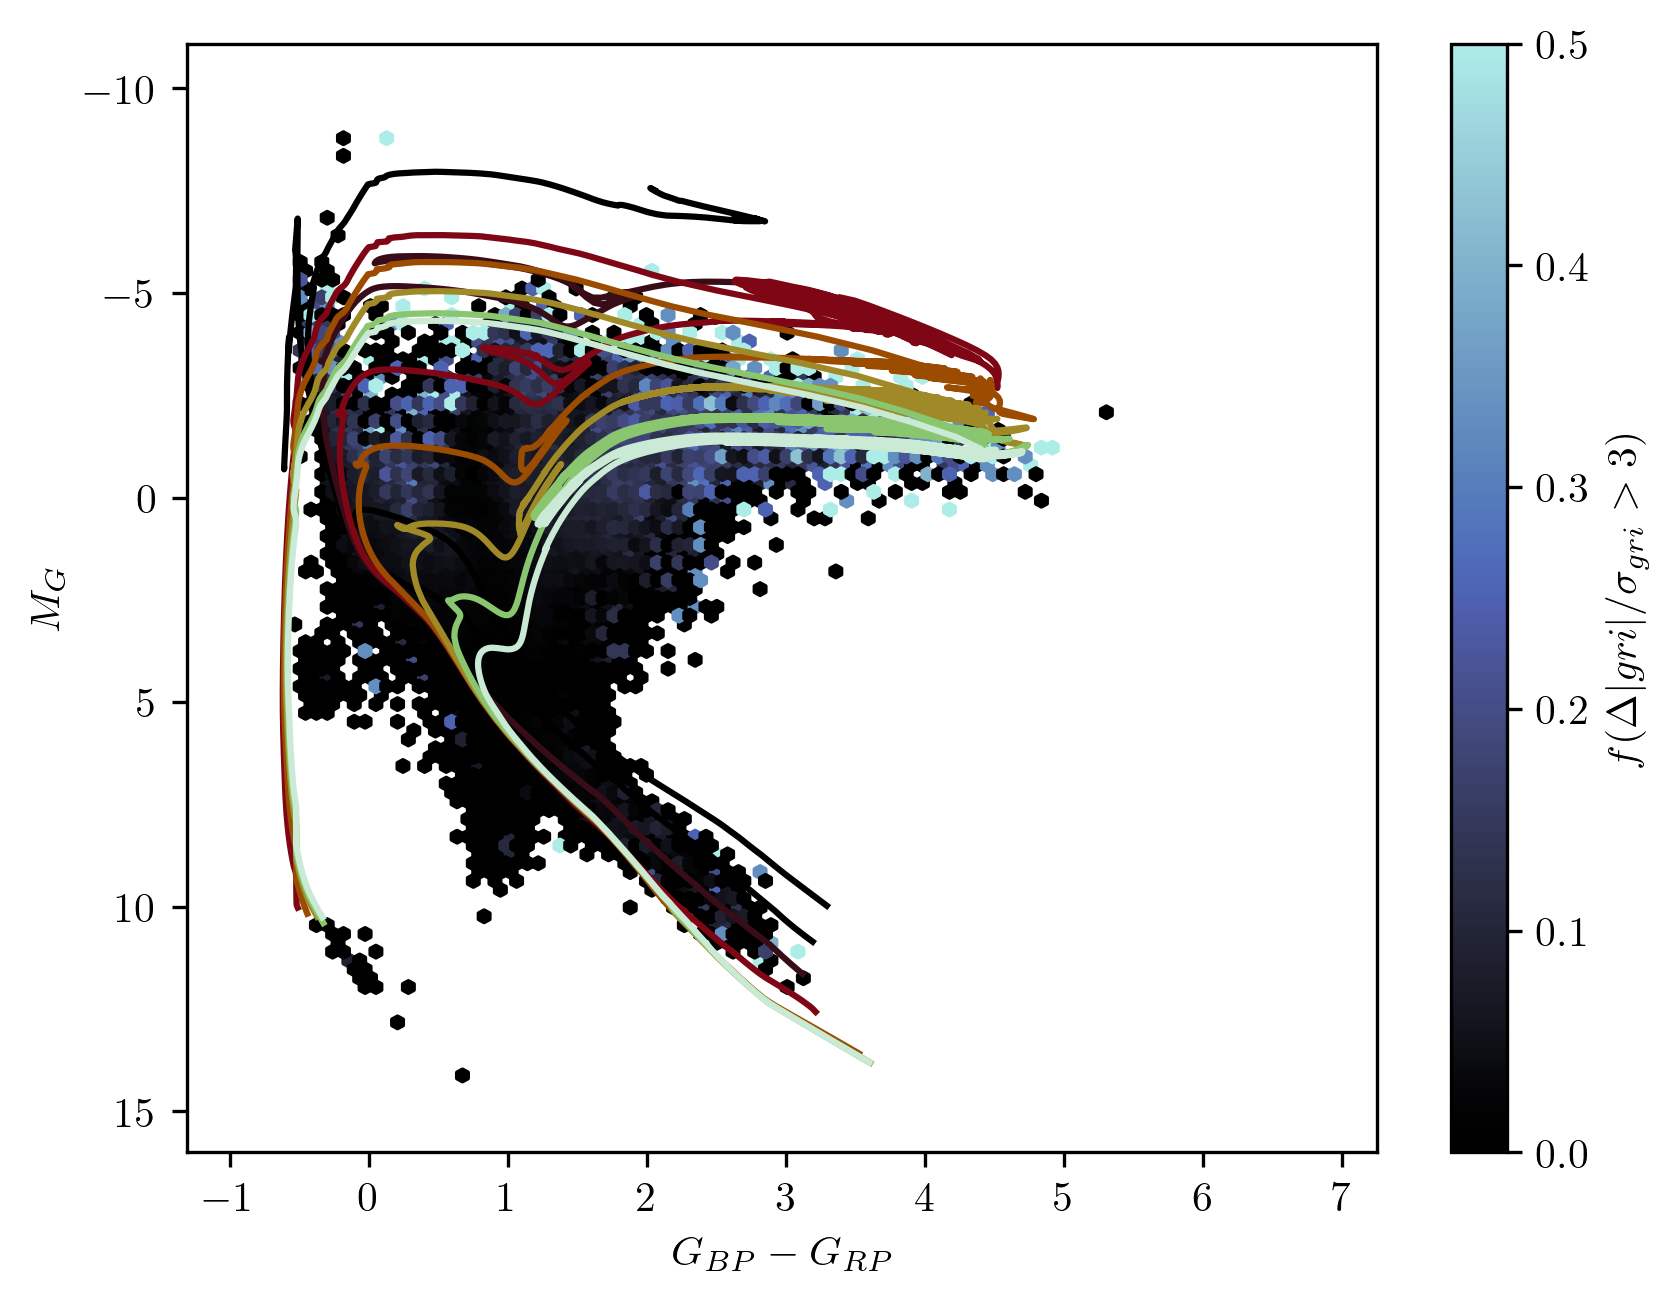

In [22]:
fig = plt.figure(dpi=300)
plt.hexbin(clean['bp_rp_0'], M_G, 
           C=np.sqrt(np.array([df[f'Delta_{band}_per_kyr'].values**2.0 for band in ['g','r','i']]).sum(axis=0)), 
           cmap='cmr.sapphire', vmin=0, vmax=0.5, mincnt=1,
           reduce_C_function=f_above_3sigma)
plt.colorbar(label='$f(\Delta|gri|/\sigma_{gri} > 3)$')

for age,g in Gmist.groupby('log10_isochrone_age_yr'):
    if (age % 0.5 == 0)&(age > 6):
        plt.plot(g['Gaia_BP_EDR3']-g['Gaia_RP_EDR3'],g['Gaia_G_EDR3'],c=age_cmap(age_norm(age)))
        
plt.gca().invert_yaxis()
plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$M_G$')
plt.savefig('/Users/carina/Downloads/frac_blah.pdf')

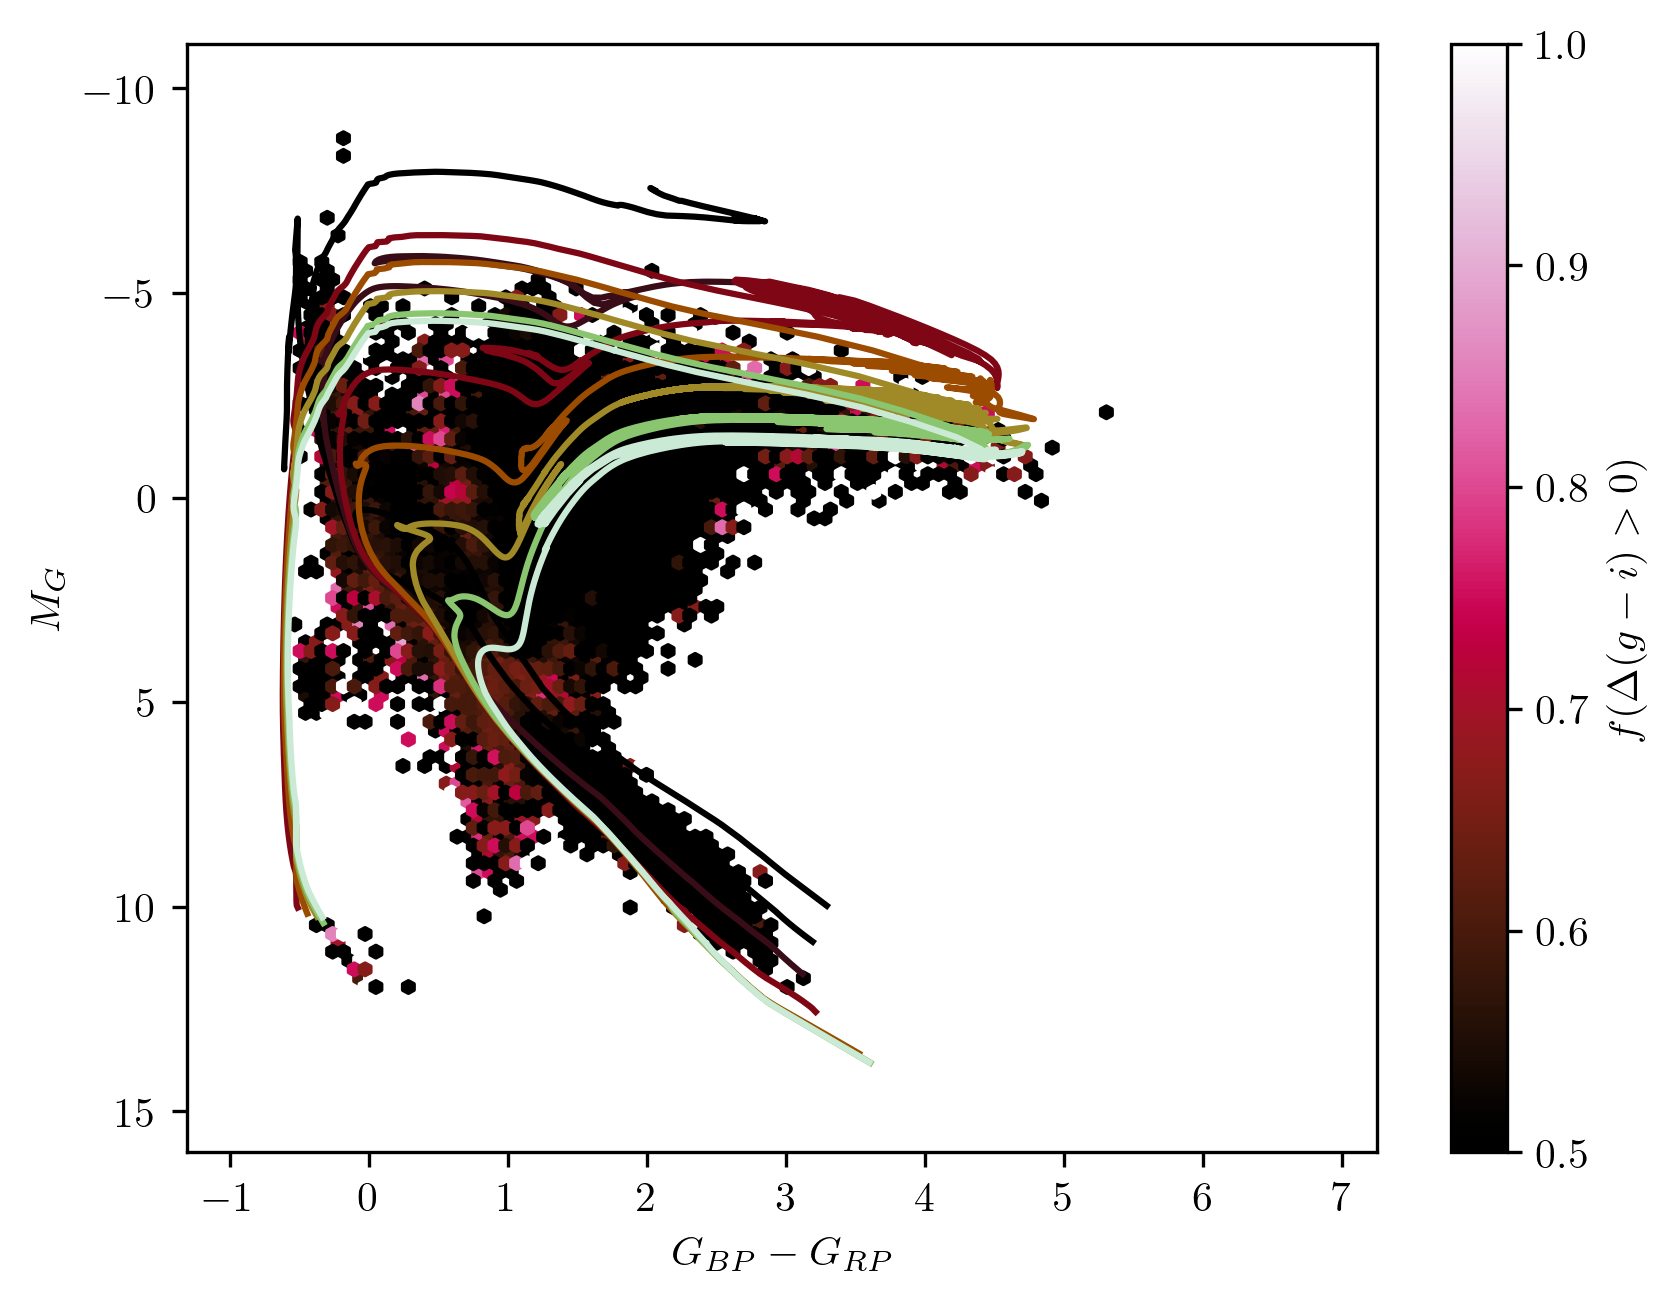

In [31]:
fig = plt.figure(dpi=300)
plt.hexbin(clean['bp_rp_0'], clean['M_G'], 
           C=d_gi, 
           cmap='cmr.flamingo', vmin=0.5, vmax=1, mincnt=1,
           reduce_C_function=f_red_gi)
plt.colorbar(label='$f(\Delta(g-i) > 0)$')

for age,g in Gmist.groupby('log10_isochrone_age_yr'):
    if (age % 0.5 == 0)&(age > 6):
        plt.plot(g['Gaia_BP_EDR3']-g['Gaia_RP_EDR3'],g['Gaia_G_EDR3'],c=age_cmap(age_norm(age)))
        
plt.gca().invert_yaxis()
plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$M_G$')
plt.savefig('/Users/carina/Downloads/frac_moving_red.pdf')

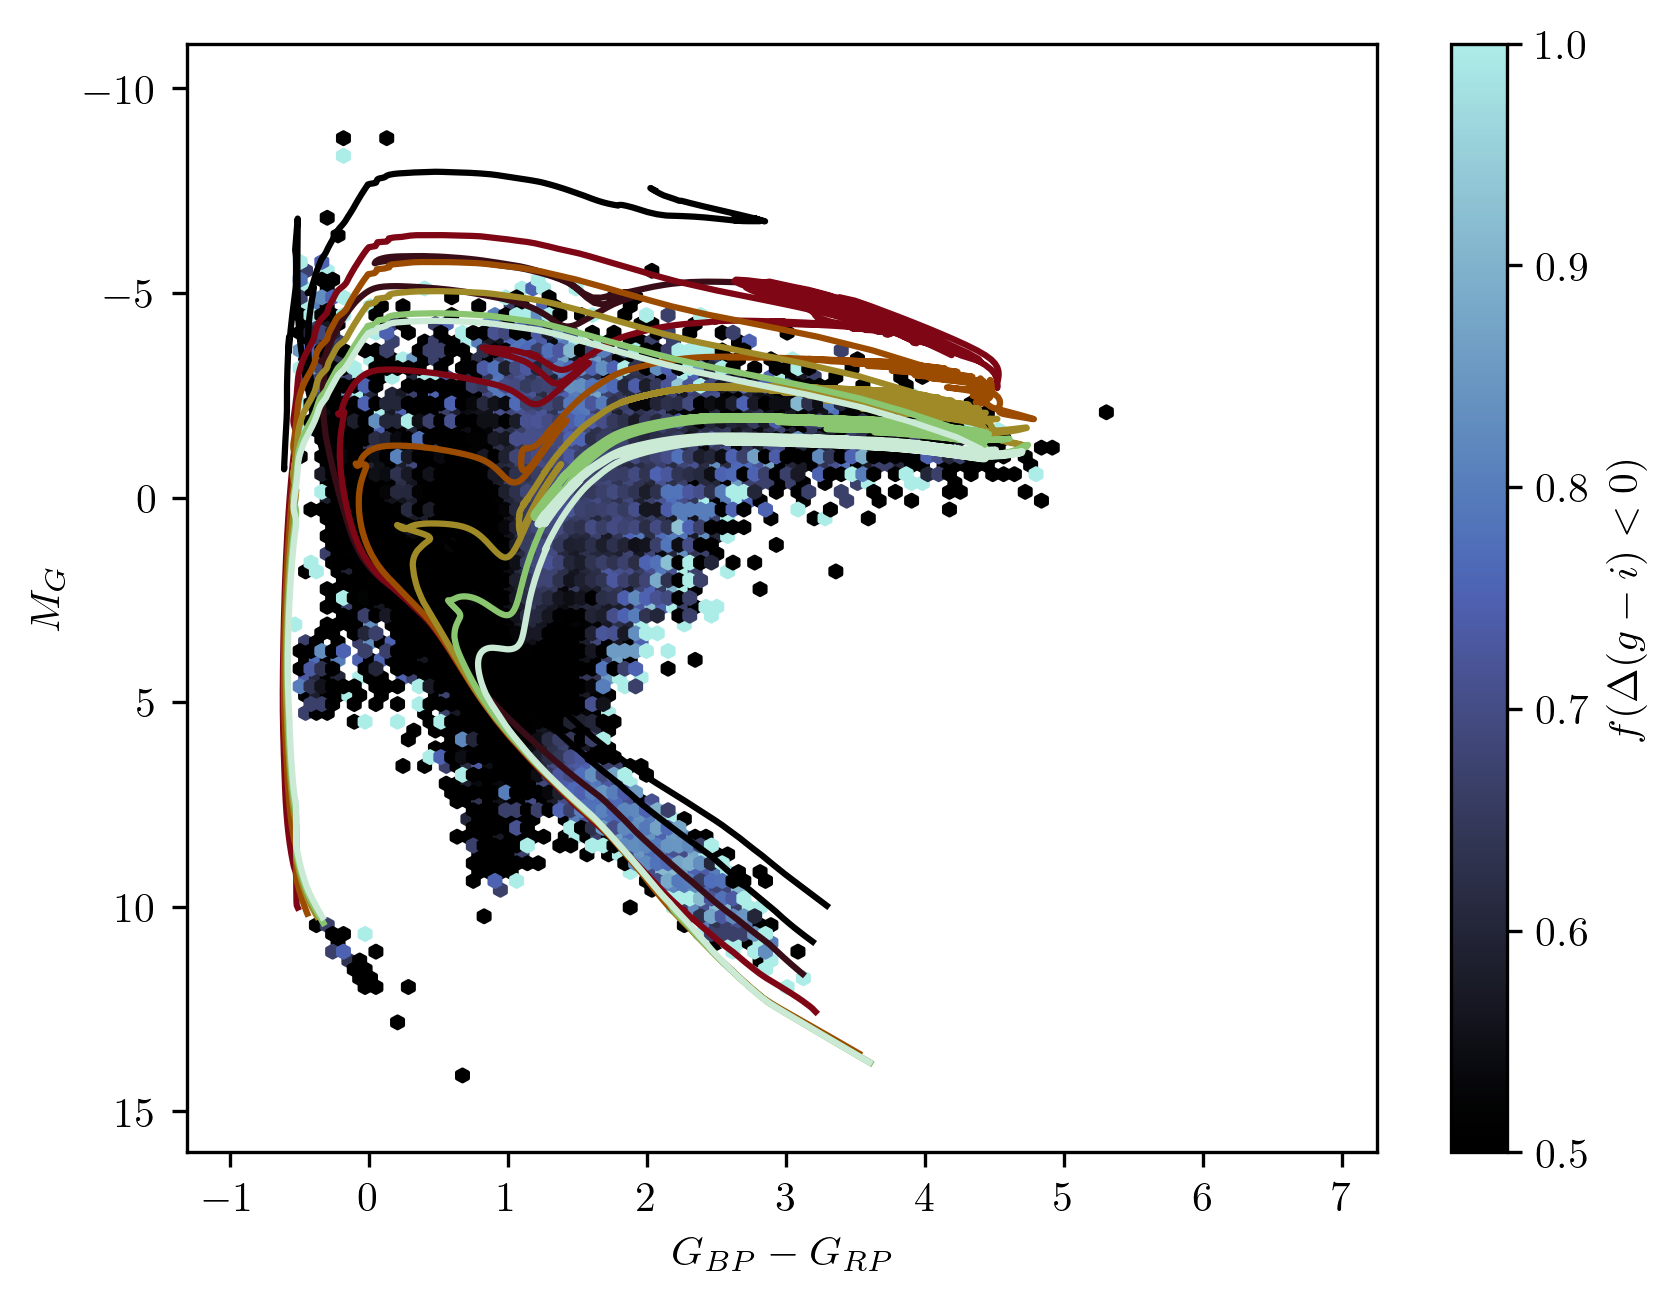

In [29]:
fig = plt.figure(dpi=300)
plt.hexbin(clean['bp_rp_0'], clean['M_G'], 
           C=d_gi, 
           cmap='cmr.sapphire', vmin=0.5, vmax=1, mincnt=1,
           reduce_C_function=f_blue_gi)
plt.colorbar(label='$f(\Delta(g-i) < 0)$')

for age,g in Gmist.groupby('log10_isochrone_age_yr'):
    if (age % 0.5 == 0)&(age > 6):
        plt.plot(g['Gaia_BP_EDR3']-g['Gaia_RP_EDR3'],g['Gaia_G_EDR3'],c=age_cmap(age_norm(age)))
        
plt.gca().invert_yaxis()
plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$M_G$')
plt.savefig('/Users/carina/Downloads/frac_moving_blue.pdf')

In [ ]:
from scipy.stats import binned_statistic_2d
clean['Delta_gi_per_kyr'] = clean['Delta_g_per_kyr'] - clean['Delta_i_per_kyr']

In [ ]:
statistic, x_edge, y_edge, binnumber = binned_statistic_2d(clean['bp_rp_0'], clean['M_G'], clean[['Delta_gi_per_kyr','Delta_g_per_kyr']].values,bins=100)

In [33]:
df

Delta_u_per_kyr  Delta_g_per_kyr  Delta_r_per_kyr  \
source_id                                                                
5041740170358770944        -0.033956         0.002695        -0.000014   
3504476267364687232        -0.007384         0.008188        -0.000340   
6240929124265524096        -0.383931        -0.087958        -0.024482   
5458335780274988032        -0.376268        -0.112454        -0.716450   
5458347771823622016        -0.018473         0.011097         0.003528   
...                              ...              ...              ...   
690830616091804416         -0.153370        -0.338730        -0.025175   
3426760650915604352        -0.078058        -0.031803        -0.009825   
1891605134482698624        -0.159476        -0.113281        -0.072319   
691640784362347392         -0.194837        -0.098933        -0.026916   
1445316182265409920        -0.077020        -0.184156        -0.335247   

                     Delta_i_per_kyr  Delta_z_per_kyr  
source_id                                              
5041740170358770944        -0.155748         0.006277  
3504476267364687232         0.003408         0.004007  
6240929124265524096        -0.018501        -0.522435  
5458335780274988032        -0.017452        -0.381687  
5458347771823622016         0.007136         0.009569  
...                              ...              ...  
690830616091804416         -0.026560        -0.219918  
3426760650915604352        -0.074892        -0.040663  
1891605134482698624        -0.084214        -0.019080  
691640784362347392         -0.026368        -0.248673  
1445316182265409920        -0.044973        -0.059002  

[3462924 rows x 5 columns]

# Older stuff with SDSS CMD

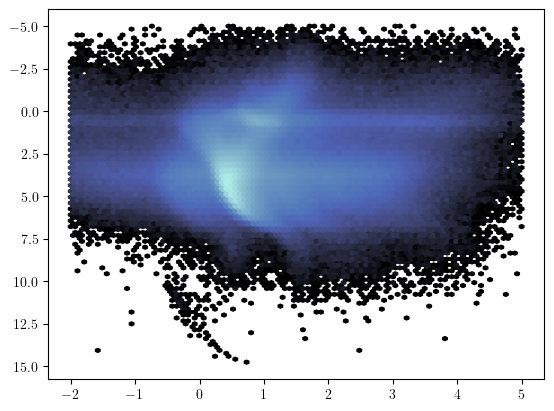

In [165]:
gr = clean['g']-clean['r']
plt.hexbin(gr[this], M_G[this], cmap='cmr.sapphire', mincnt=1, bins='log')
plt.gca().invert_yaxis()

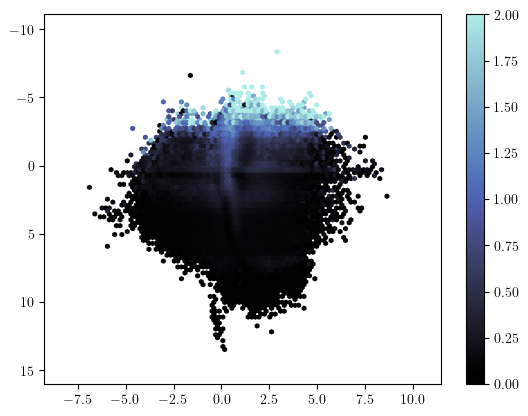

In [153]:
plt.hexbin(gr, M_G, C=clean['ag_gspphot'], cmap='cmr.sapphire', mincnt=1, vmin=0,vmax=2)
plt.colorbar()
plt.gca().invert_yaxis()

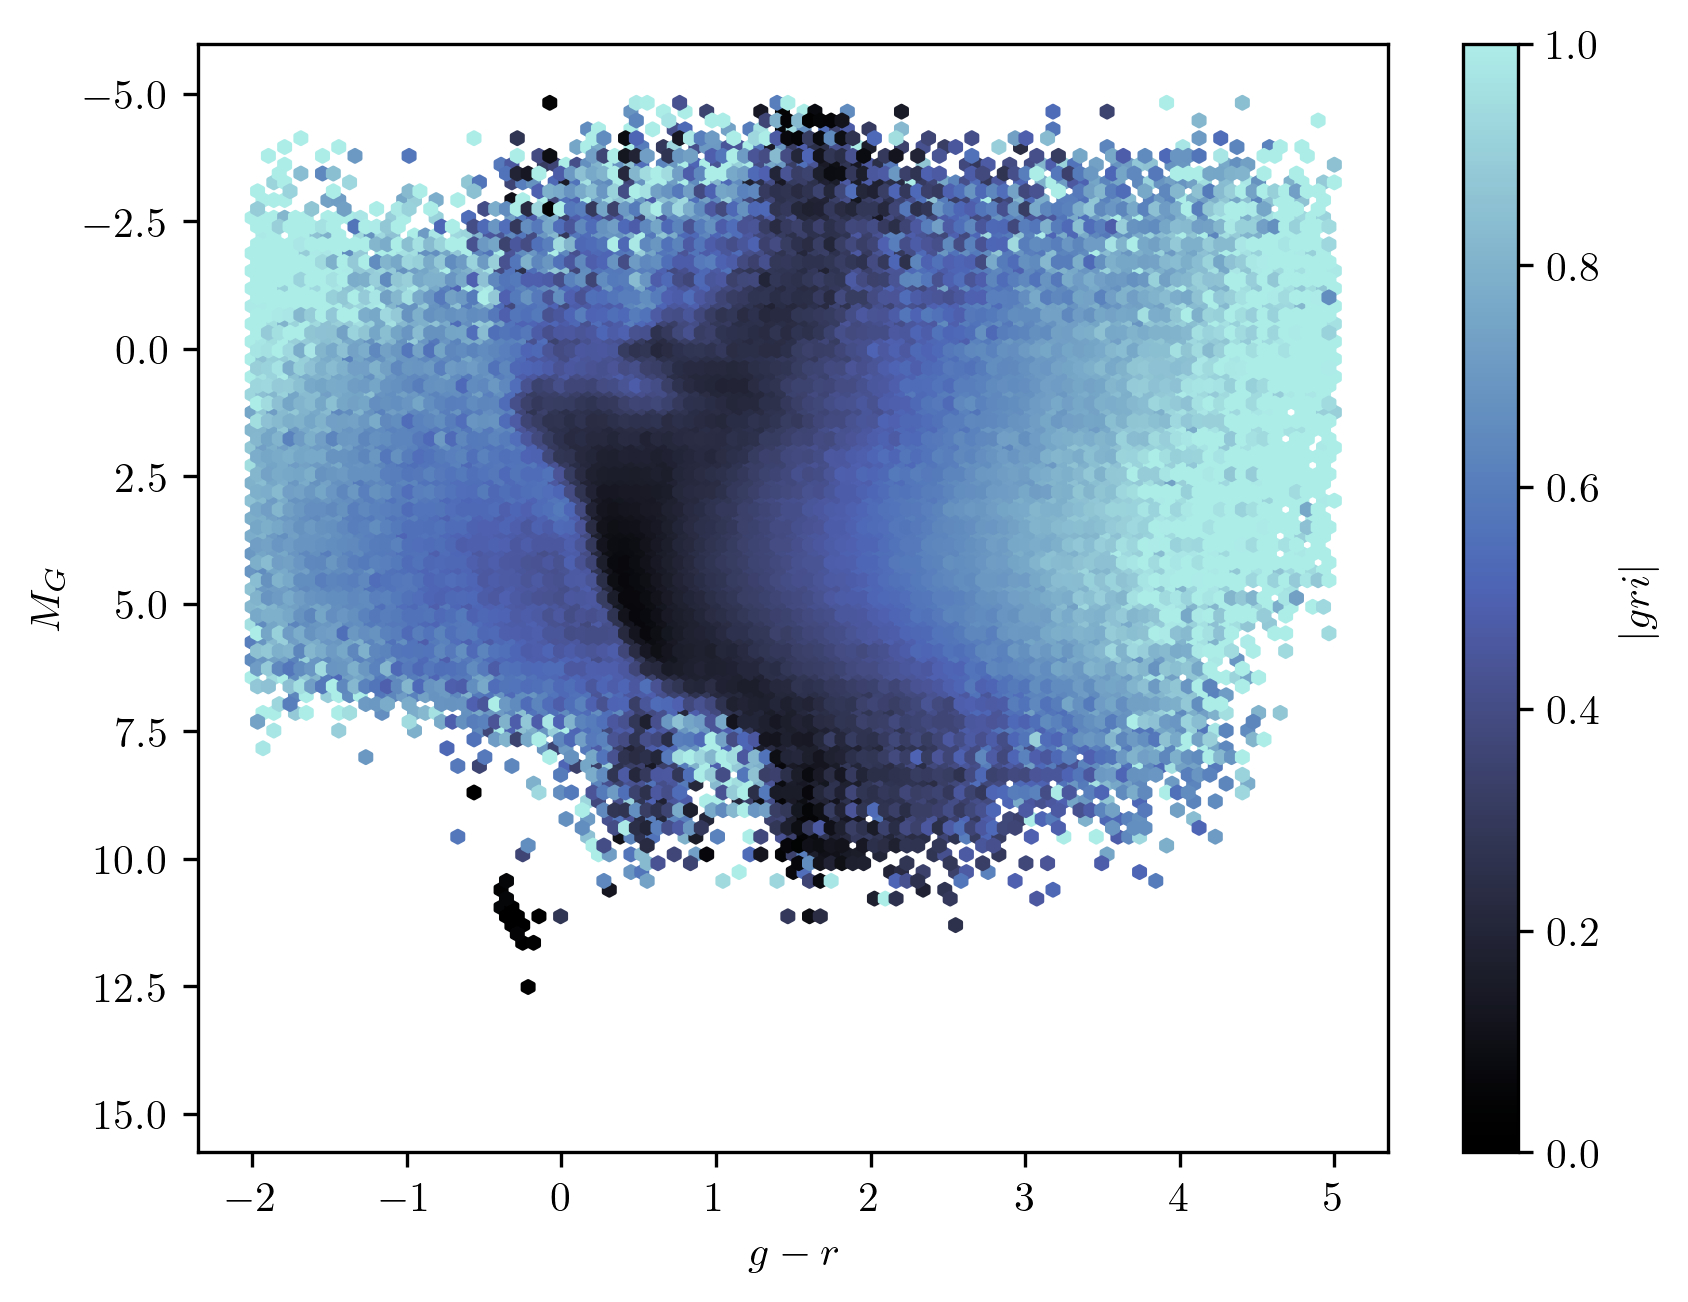

In [166]:
fig = plt.figure(dpi=300)
this = (gr > -2) & (gr < 5) & (M_G > -5) & (M_G < 15)
plt.hexbin(gr[this], M_G[this], 
           C=np.sqrt(np.array([df[f'Delta_{band}_per_kyr'].values**2.0 for band in ['g','r','i']]).sum(axis=0))[this], 
           cmap='cmr.sapphire', vmin=0, vmax=1, mincnt=1)
plt.colorbar(label='$|gri|$')
plt.gca().invert_yaxis()
plt.xlabel(r'$g-r$')
plt.ylabel(r'$M_G$')
plt.savefig('/Users/carina/Downloads/blah.pdf')

In [161]:
X_all = np.sqrt(np.array([df[f'Delta_{band}_per_kyr'].values**2.0 for band in ['g','r','i']]).sum(axis=0))[this]
mu = X_all.mean()
sig = X_all.std()
def f_above_3sigma(X):
    X = np.array(X)
    Z = (X-mu)/sig
    return len(X[np.abs(Z) > 3])/len(X)

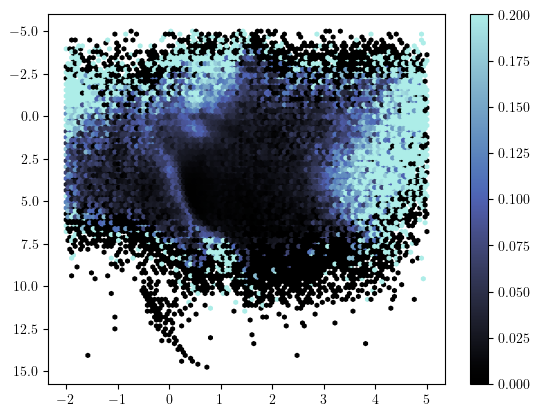

In [164]:
plt.hexbin(gr[this], M_G[this], 
           C=np.sqrt(np.array([df[f'Delta_{band}_per_kyr'].values**2.0 for band in ['g','r','i']]).sum(axis=0))[this],
           reduce_C_function=f_above_3sigma,vmin=0,vmax=0.2,
           cmap='cmr.sapphire')
plt.colorbar()
plt.gca().invert_yaxis()

In [ ]:
scipy binned 2d statistic
fraction moving blue in say g-i vs. fraction red

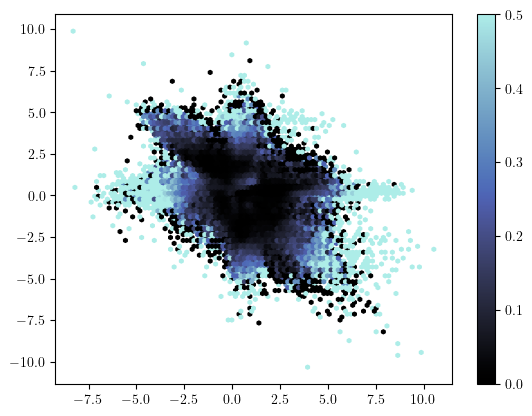

In [146]:
plt.hexbin(gr, clean['r']-clean['i'], 
           C=np.array([df[f'Delta_{band}_per_kyr'].values**2.0 for band in bands]).sum(axis=0),
           reduce_C_function=f_above_3sigma,vmin=0,vmax=0.5,
           cmap='cmr.sapphire')
plt.colorbar()

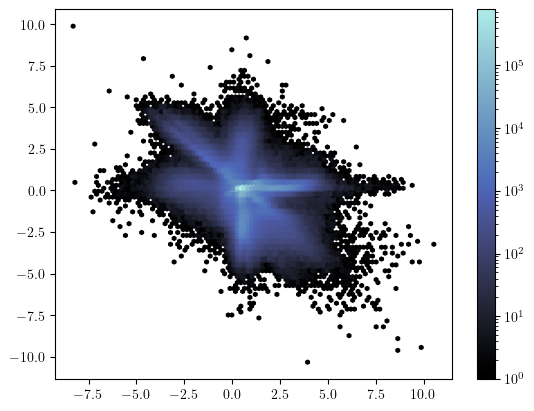

In [147]:
plt.hexbin(gr, clean['r']-clean['i'], 
           bins='log',
           cmap='cmr.sapphire')
plt.colorbar()

In [82]:
merged.columns

Index(['Sdss_mag_u', 'Sdss_mag_g', 'Sdss_mag_r', 'Sdss_mag_i', 'Sdss_mag_z',
       'Sdss_flux_u', 'Sdss_flux_g', 'Sdss_flux_r', 'Sdss_flux_i',
       'Sdss_flux_z', 'Sdss_flux_error_u', 'Sdss_flux_error_g',
       'Sdss_flux_error_r', 'Sdss_flux_error_i', 'Sdss_flux_error_z',
       'Sdss_mag_u_error', 'Sdss_mag_g_error', 'Sdss_mag_r_error',
       'Sdss_mag_i_error', 'Sdss_mag_z_error', 'phot_g_mean_mag', 'bp_rp',
       'ag_gspphot', 'ebpminrp_gspphot', 'r_med_photogeo', 'u', 'err_u', 'g',
       'err_g', 'r', 'err_r', 'i', 'err_i', 'z', 'err_z', 'bp_rp_0',
       'mean_xp_bjd', 'sdss_bjd'],
      dtype='object')